#  <center><font color="green">Pubg Game Prediction</font></center>

# <center><img src="pubggif.gif"></center>

### Table content

1. [Importing Libraries](#import)
2. [Reading data](#read)
3. [Data Wrangling](#wrangling)

# <font color = "green"> Importing Libraries </font><a class="anchor" id = "import">

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,6]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import catboost as cb

from sklearn.metrics import mean_squared_error,r2_score

# <font color = "green">Reading data</font><a class="anchor" id = "read">

In [2]:
df = pd.read_csv("PUBG_Game_Prediction_data.csv")
 

In [3]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df.shape

(4446966, 29)

# <font color = "green">Data wrangling</font><a class="anchor" id = "wrangling">

# Checking & handling missing values 

In [5]:
df.drop(df[df["winPlacePerc"].isnull()].index[0],inplace=True)

In [6]:
df["winPlacePerc"].isnull().sum()

0

Distribution of the players

In [7]:
# df['matchId'].value_counts()

df['playersJoined'] = df.groupby("matchId")['matchId'].transform('count')

In [8]:

df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


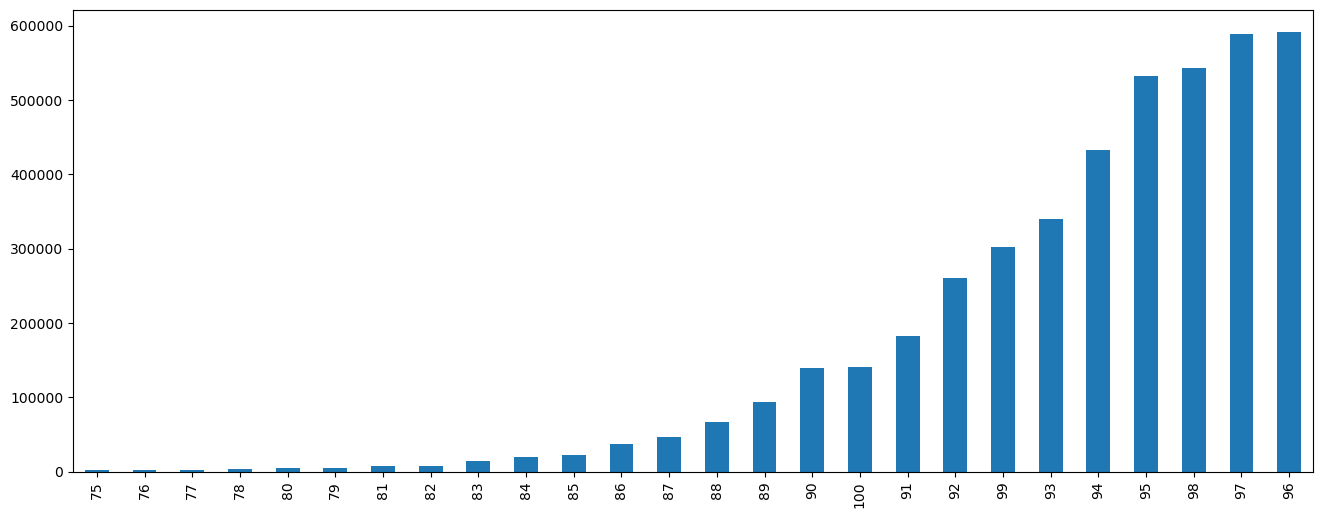

In [9]:
 
df[df["playersJoined"]>=75]["playersJoined"].value_counts(ascending=True).plot(kind="bar");

In [10]:
# parameter to know total distance
df["totalDistance"] = df["rideDistance"]+df["walkDistance"]+df["swimDistance"]

# prepare a data parameter to check for anlomaly detection that a person without moving killed others
df['killswithoutmoving'] = (df["kills"]>0) & (df["totalDistance"]==0)

In [11]:
df[df["killswithoutmoving"]==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killswithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [12]:
df[df["killswithoutmoving"]==True].shape

(1535, 32)

In [13]:
df.drop(df[df["killswithoutmoving"]==True].index,inplace=True)

In [14]:
# deleted the anlomaly using the list of indexes

# Extra - Ordinary  road kills ??

#<center> <img src="pronegif.gif"> </center>

In [15]:
df[df["roadKills"]>5].shape

(46, 32)

In [16]:
df.drop(df[df["roadKills"]>5].index, inplace=True)

# No of kills in a game 

# <center> <img src="killsgif.gif"> </center>

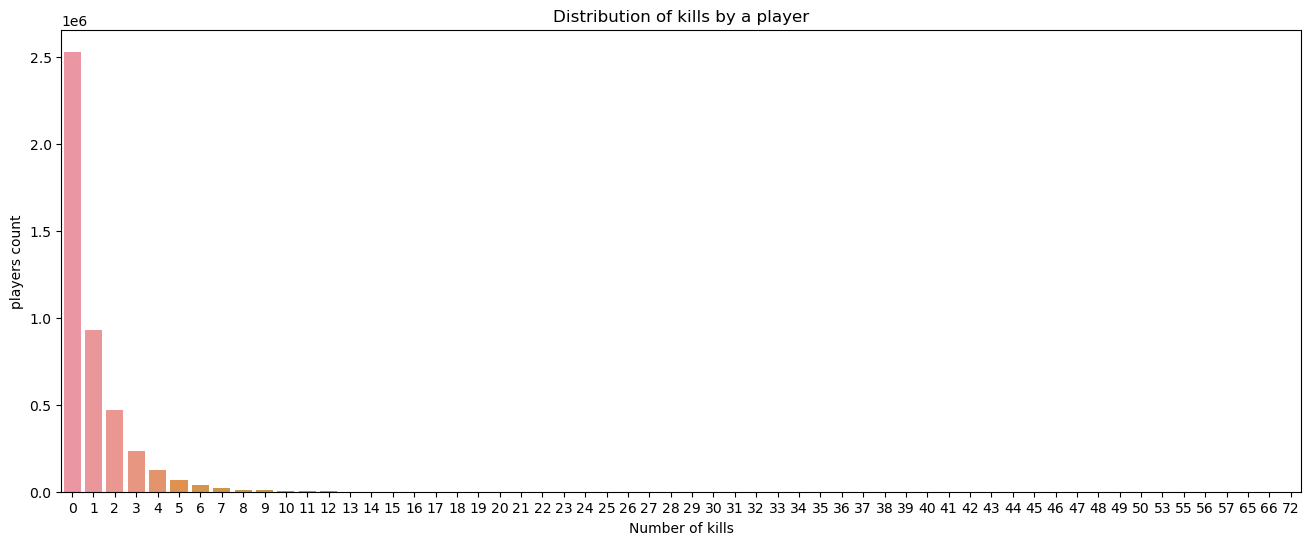

In [17]:
sns.countplot(data=df,x=df["kills"]).set_title("Distribution of kills by a player")
plt.xlabel("Number of kills")
plt.ylabel("players count")
plt.show()

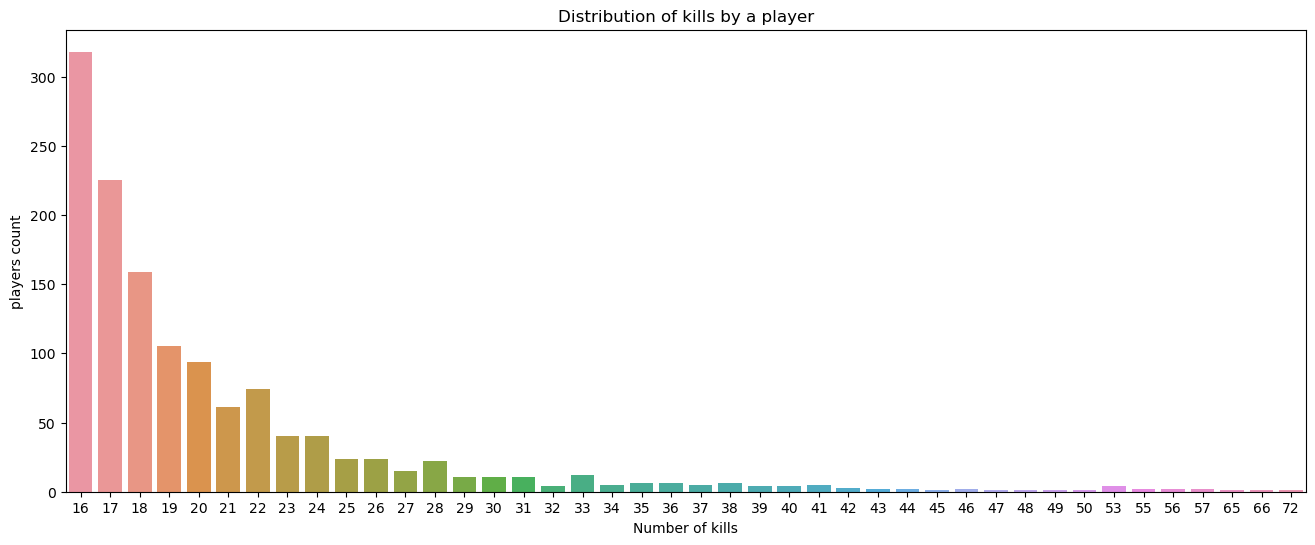

In [18]:
sns.countplot(data=df[df["kills"]>15],x=df[df["kills"]>15]["kills"]).set_title("Distribution of kills by a player")
plt.xlabel("Number of kills")
plt.ylabel("players count")
plt.show()

In [19]:
df[df["kills"]>20].shape

(417, 32)

In [20]:
df.drop(df[df["kills"]>20].index,inplace=True)

# Head Shot

# <center><img src="headshot.gif"></center>

In [21]:
df["headshot_rate"] = df["headshotKills"]/df["kills"]
df["headshot_rate"] = df["headshot_rate"].fillna(0)

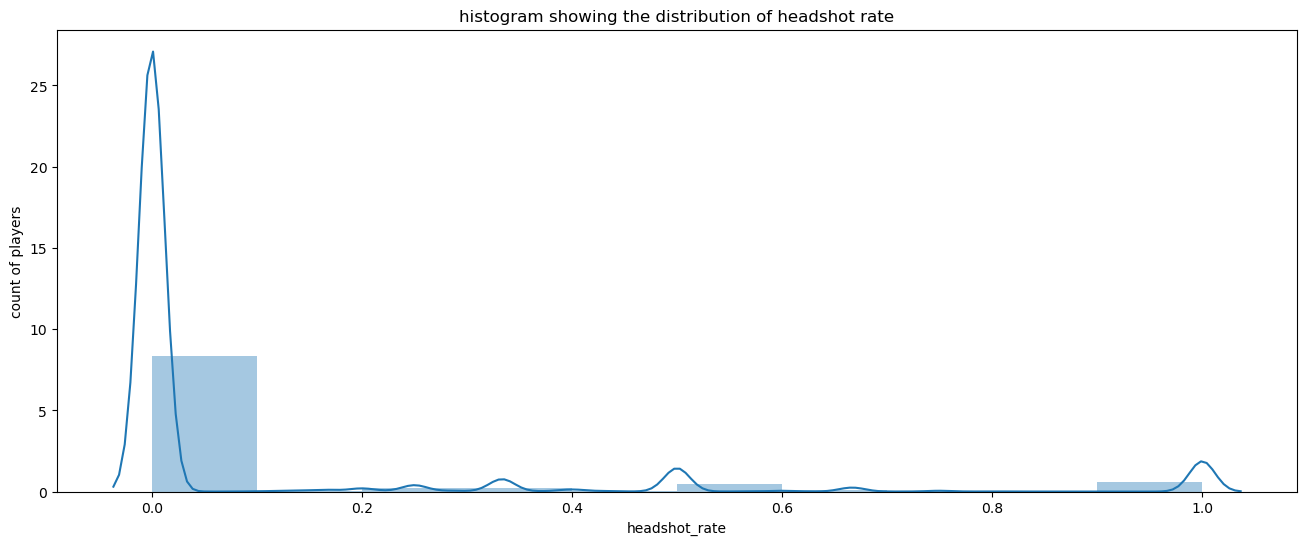

In [22]:
sns.distplot(df["headshot_rate"],bins=10).set_title("histogram showing the distribution of headshot rate")
plt.ylabel("count of players")
plt.show()

In [23]:
df.drop(df[(df["headshot_rate"]==1) & (df["kills"]>5)].index,inplace=True)

In [24]:
df.shape

(4444780, 33)

# Longest shot

[]

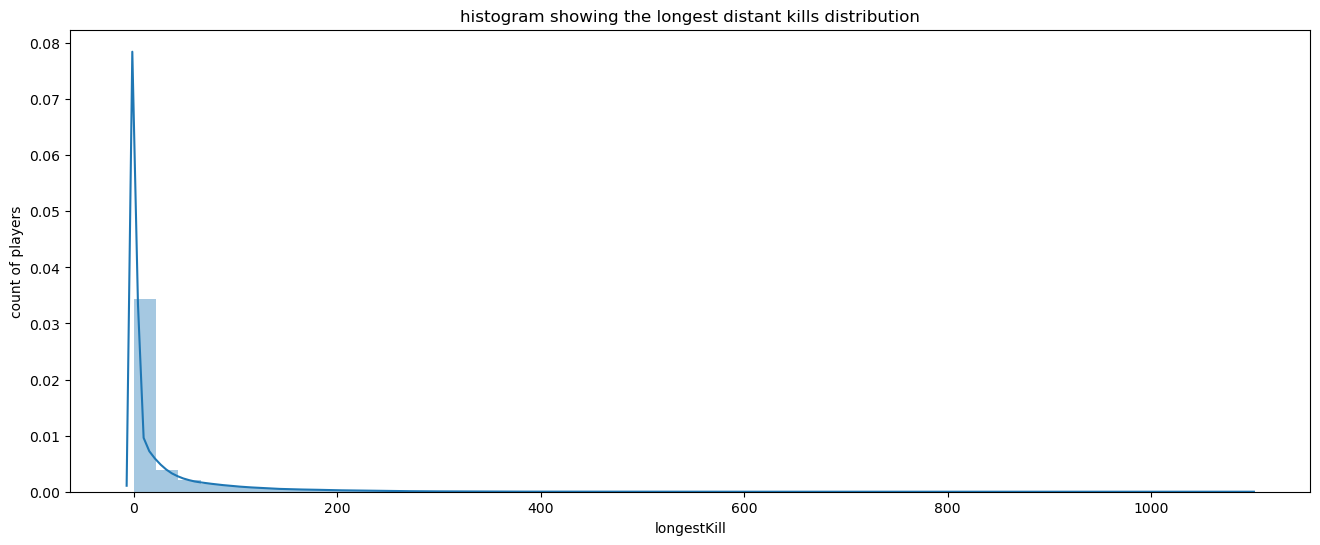

In [25]:
sns.distplot(df["longestKill"],bins=50).set_title("histogram showing the longest distant kills distribution")
plt.ylabel("count of players")
plt.plot()

In [26]:
# almost all the kills ranges from 0 to 200

In [27]:
df[df["longestKill"]>500].shape

(1736, 33)

In [28]:
df.drop(df[df["longestKill"]>500].index,inplace=True)

In [29]:
df.shape

(4443044, 33)

# Weapons change

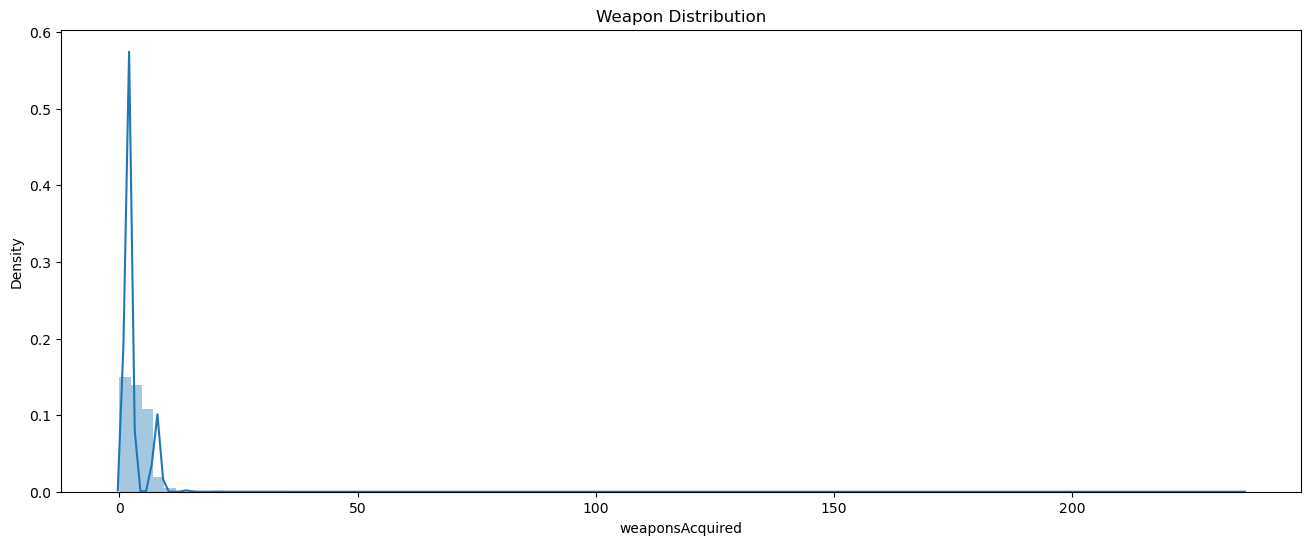

In [30]:
sns.distplot(df['weaponsAcquired'],bins=100).set_title("Weapon Distribution");

In [31]:
df[df["weaponsAcquired"]>15].shape

(5435, 33)

In [32]:
df.drop(df[df["weaponsAcquired"]>15].index,inplace=True)

# EDA

In [33]:
df.shape

(4437609, 33)

In [34]:
df.isnull().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts                0
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints            0
kills                 0
killStreaks           0
longestKill           0
matchDuration         0
matchType             0
maxPlace              0
numGroups             0
rankPoints            0
revives               0
rideDistance          0
roadKills             0
swimDistance          0
teamKills             0
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          0
playersJoined         0
totalDistance         0
killswithoutmoving    0
headshot_rate         0
dtype: int64

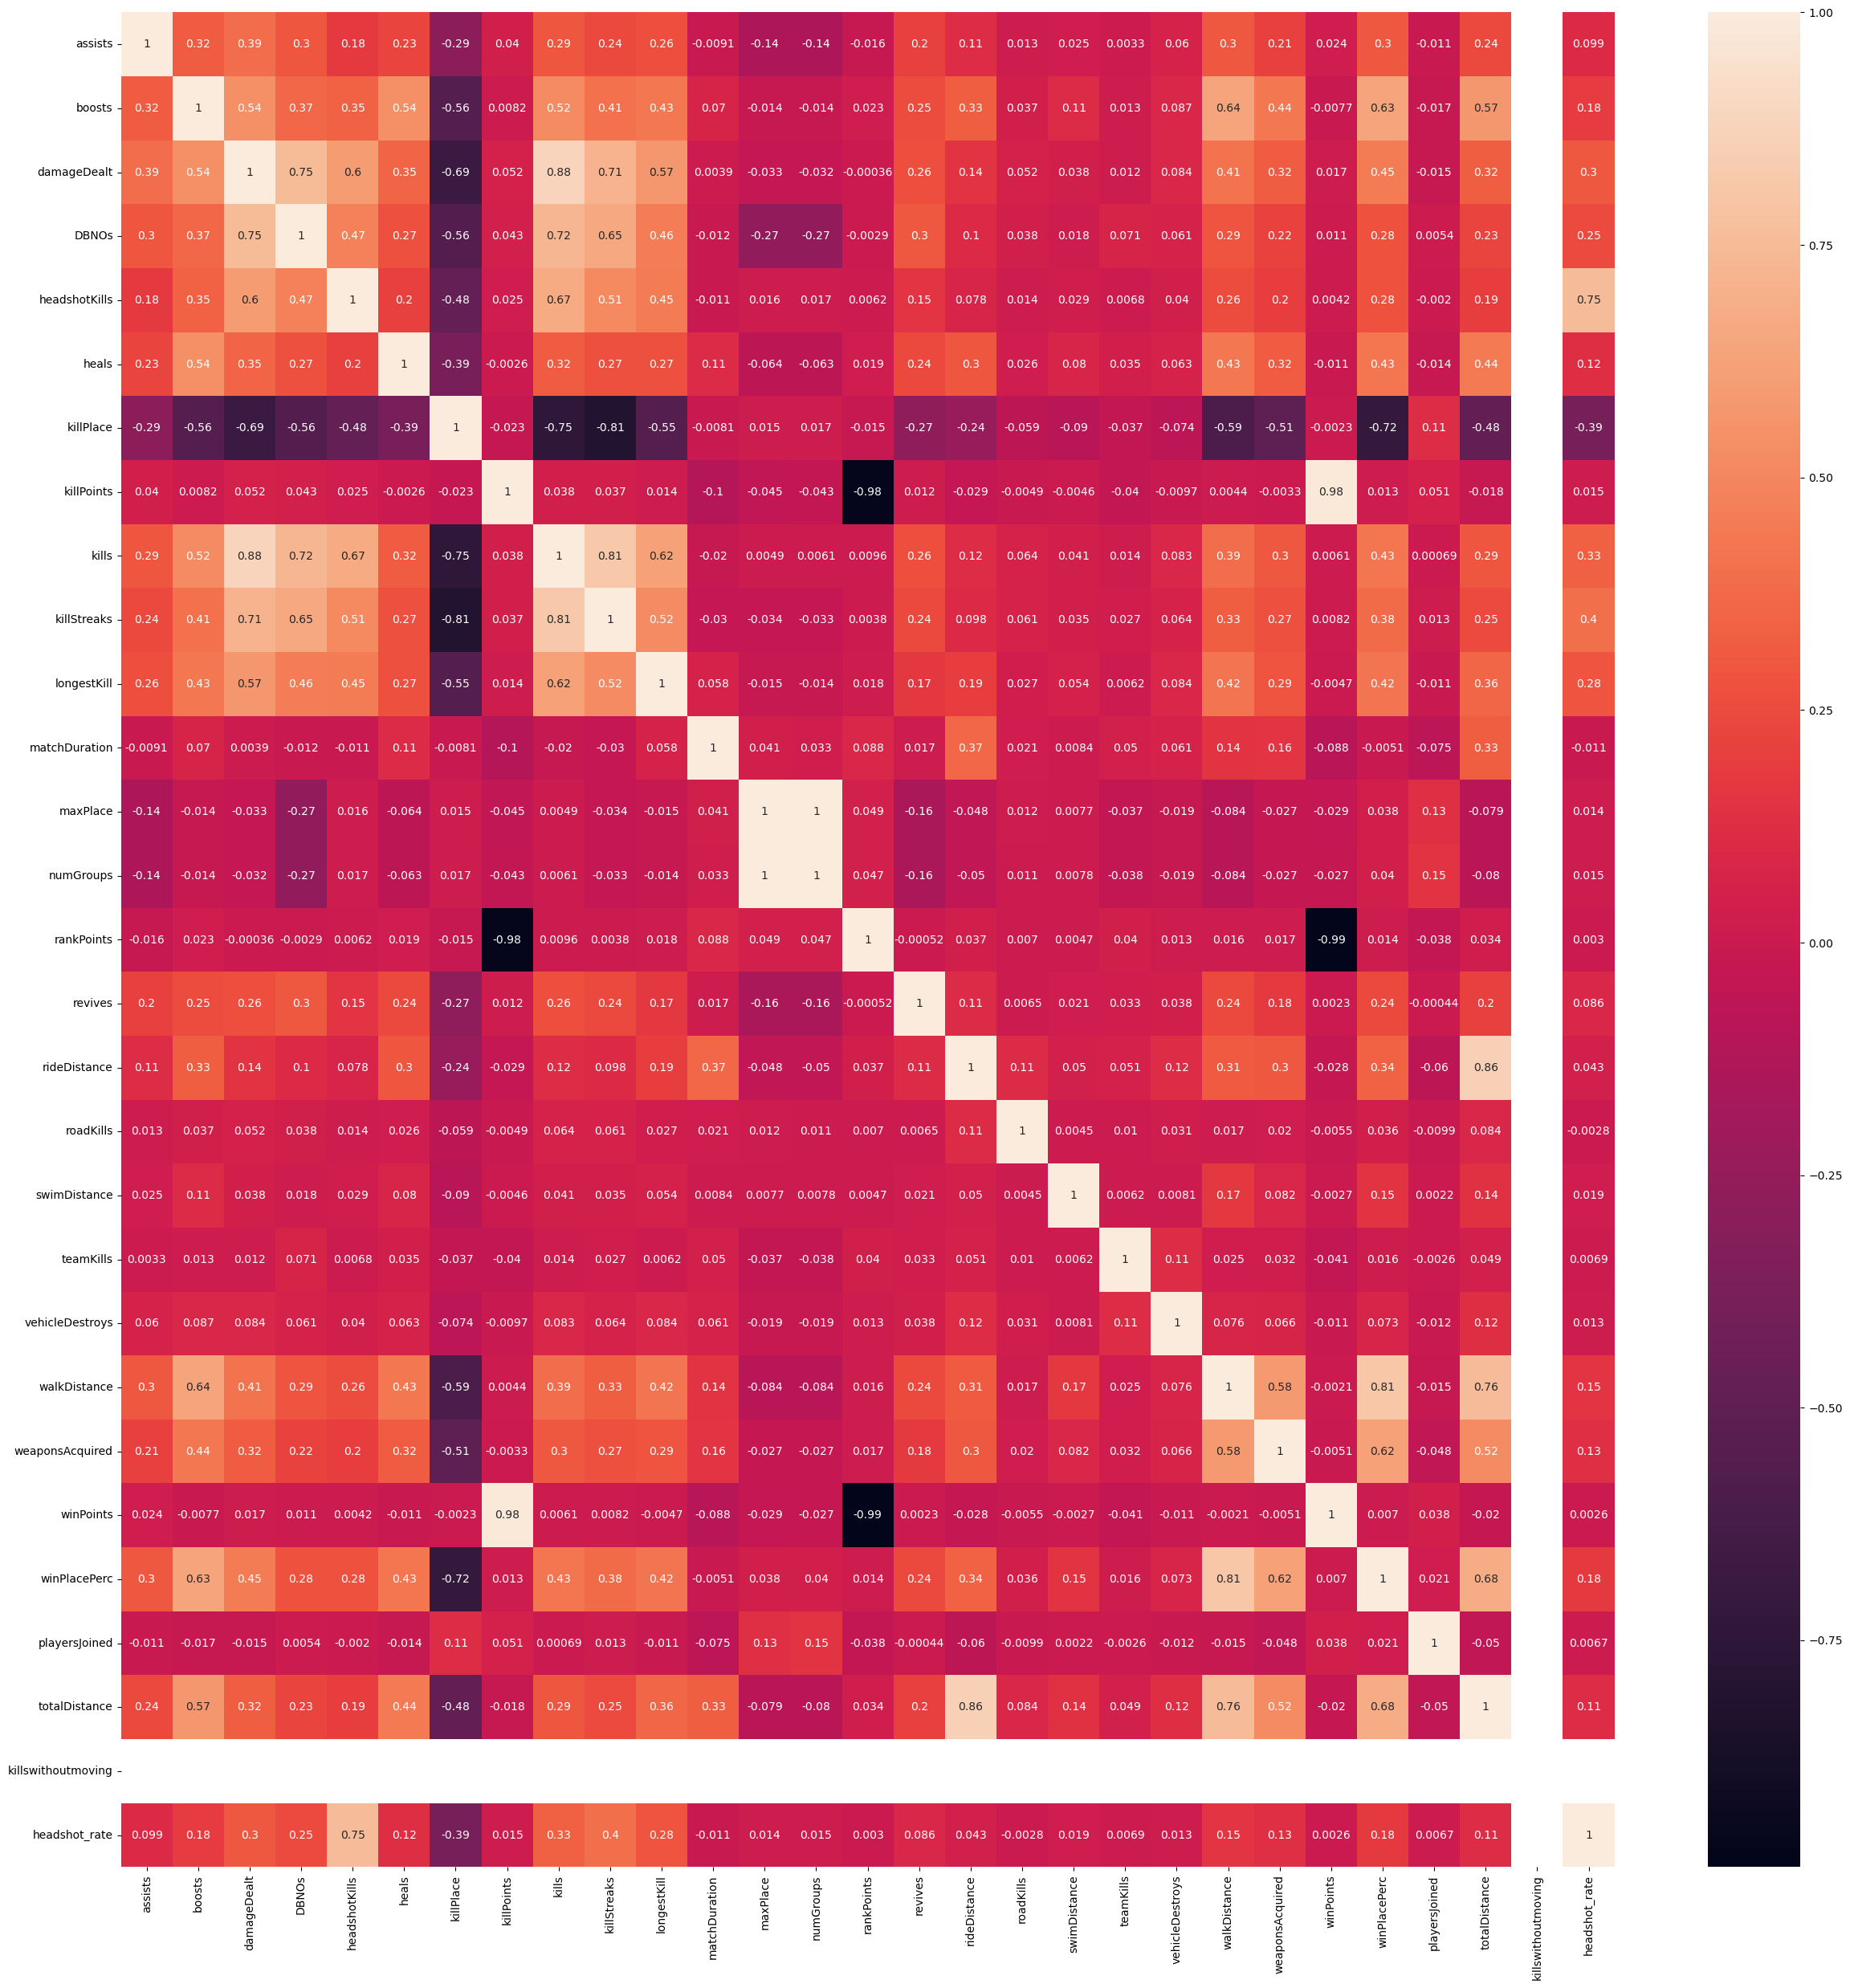

In [35]:
# correlation and parameter with win prediction
plt.figure(figsize=[30,30])
sns.heatmap(df.corr(),annot=True)
plt.show()

# Featrue Engineering

In [36]:
normalising_factor = 100-(df['playersJoined']/100)+1 


In [37]:
normalising_factor

0          100.04
1          100.09
2          100.02
3          100.09
4          100.03
            ...  
4446961    100.06
4446962    100.07
4446963    100.02
4446964    100.06
4446965    100.02
Name: playersJoined, Length: 4437609, dtype: float64

In [38]:
df['killsNorm'] = df["kills"]*normalising_factor
df['damageDealtNorm'] = df['damageDealt']*normalising_factor
df['maxPlaceNorm'] = df['maxPlace']*normalising_factor
df['matchDurationNorm'] = df['matchDuration']*normalising_factor
df['travelDistance'] = df['walkDistance']+df['swimDistance']+df['rideDistance']
df['healsnboots'] = df['heals']+df['boosts']
df['assist'] = df['assists']+df['revives']

In [39]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playersJoined',
       'totalDistance', 'killswithoutmoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'travelDistance', 'healsnboots', 'assist'],
      dtype='object')

In [40]:
df = df.drop(columns=['Id','groupId','matchId','assists','boosts','walkDistance','swimDistance','rideDistance','heals','revives',
                'kills','damageDealt','maxPlace','matchDuration'])

In [41]:
df.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killswithoutmoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,travelDistance,healsnboots,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


In [42]:
# Handling categorical data

In [43]:
X = df.drop('winPlacePerc',axis=1)
y = df['winPlacePerc']

In [44]:
features = X.columns

In [45]:
X = pd.get_dummies(X,columns = ['matchType','killswithoutmoving'])

In [64]:
X.head()
features = X.columns

In [65]:
df['matchType'].value_counts()

squad-fpp           1755098
duo-fpp              996205
squad                625502
solo-fpp             536344
duo                  313280
solo                 181570
normal-squad-fpp      13286
crashfpp               6274
normal-duo-fpp         5016
flaretpp               2498
normal-solo-fpp         857
flarefpp                718
crashtpp                367
normal-squad            315
normal-duo              144
normal-solo             135
Name: matchType, dtype: int64

In [66]:
X.shape

(4437609, 40)

In [49]:
# scaling data

In [50]:
sc = StandardScaler()
sc.fit(X)
X = pd.DataFrame(sc.transform(X))

In [51]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.582723,-0.384145,0.449543,1.172543,-0.765177,-0.459685,-0.732763,-1.212394,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,1.236289,0.0
1,-0.582723,-0.384145,0.340251,-0.804724,-0.765177,-0.459685,-0.775734,0.803563,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,1.236289,0.0
2,-0.582723,-0.384145,-0.024055,-0.804724,-0.765177,-0.459685,0.169631,0.813066,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,-0.808872,0.0
3,-0.582723,-0.384145,0.996002,-0.804724,-0.765177,-0.459685,-0.560878,0.700389,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,-0.370782,-0.405072,1.236289,0.0
4,-0.582723,-0.384145,-0.096916,-0.804724,0.647528,0.727175,2.232246,0.906736,-0.049576,-0.14253,...,-0.03364,-0.005516,-0.013898,-0.008426,-0.054799,-0.206547,2.697000,-0.405072,-0.808872,0.0


In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3106326, 40)
(1331283, 40)
(3106326,)
(1331283,)


#  Catboost model

In [54]:
import catboost as cb

In [55]:
train_df = cb.Pool(X_train,y_train)
test_df  = cb.Pool(X_test,y_test)

In [56]:
model = cb.CatBoostRegressor(loss_function= "RMSE")

In [57]:
# using grid search cv

In [58]:
grid = {
    'iterations':[100,500],
    'learning_rate':[0.03,0.1],
    'depth':[2,4,6,8]
}
model.grid_search(grid,train_df)

0:	learn: 0.5483100	test: 0.5481525	best: 0.5481525 (0)	total: 392ms	remaining: 38.8s
1:	learn: 0.5334652	test: 0.5333142	best: 0.5333142 (1)	total: 641ms	remaining: 31.4s
2:	learn: 0.5190788	test: 0.5189333	best: 0.5189333 (2)	total: 877ms	remaining: 28.4s
3:	learn: 0.5051809	test: 0.5050421	best: 0.5050421 (3)	total: 1.13s	remaining: 27.2s
4:	learn: 0.4917391	test: 0.4916049	best: 0.4916049 (4)	total: 1.38s	remaining: 26.2s
5:	learn: 0.4787066	test: 0.4785757	best: 0.4785757 (5)	total: 1.58s	remaining: 24.8s
6:	learn: 0.4661306	test: 0.4660033	best: 0.4660033 (6)	total: 1.81s	remaining: 24s
7:	learn: 0.4539174	test: 0.4537923	best: 0.4537923 (7)	total: 2.02s	remaining: 23.2s
8:	learn: 0.4421426	test: 0.4420206	best: 0.4420206 (8)	total: 2.23s	remaining: 22.6s
9:	learn: 0.4307199	test: 0.4306006	best: 0.4306006 (9)	total: 2.45s	remaining: 22.1s
10:	learn: 0.4196689	test: 0.4195559	best: 0.4195559 (10)	total: 2.67s	remaining: 21.6s
11:	learn: 0.4090079	test: 0.4089050	best: 0.4089050 (

94:	learn: 0.1398316	test: 0.1398367	best: 0.1398367 (94)	total: 21.5s	remaining: 1.13s
95:	learn: 0.1394484	test: 0.1394554	best: 0.1394554 (95)	total: 21.7s	remaining: 905ms
96:	learn: 0.1390589	test: 0.1390674	best: 0.1390674 (96)	total: 21.9s	remaining: 678ms
97:	learn: 0.1386942	test: 0.1387040	best: 0.1387040 (97)	total: 22.2s	remaining: 452ms
98:	learn: 0.1383002	test: 0.1383090	best: 0.1383090 (98)	total: 22.4s	remaining: 226ms
99:	learn: 0.1379593	test: 0.1379694	best: 0.1379694 (99)	total: 22.6s	remaining: 0us

bestTest = 0.1379693969
bestIteration = 99

0:	loss: 0.1379694	best: 0.1379694 (0)	total: 25.2s	remaining: 6m 18s
0:	learn: 0.5126944	test: 0.5125456	best: 0.5125456 (0)	total: 241ms	remaining: 23.9s
1:	learn: 0.4672365	test: 0.4671075	best: 0.4671075 (1)	total: 498ms	remaining: 24.4s
2:	learn: 0.4266067	test: 0.4264893	best: 0.4264893 (2)	total: 716ms	remaining: 23.1s
3:	learn: 0.3905638	test: 0.3904651	best: 0.3904651 (3)	total: 969ms	remaining: 23.3s
4:	learn: 0.358

87:	learn: 0.1174387	test: 0.1174333	best: 0.1174333 (87)	total: 19.1s	remaining: 2.61s
88:	learn: 0.1173147	test: 0.1173102	best: 0.1173102 (88)	total: 19.3s	remaining: 2.39s
89:	learn: 0.1170198	test: 0.1170136	best: 0.1170136 (89)	total: 19.5s	remaining: 2.17s
90:	learn: 0.1167466	test: 0.1167409	best: 0.1167409 (90)	total: 19.7s	remaining: 1.95s
91:	learn: 0.1166427	test: 0.1166372	best: 0.1166372 (91)	total: 19.9s	remaining: 1.73s
92:	learn: 0.1165405	test: 0.1165354	best: 0.1165354 (92)	total: 20.2s	remaining: 1.52s
93:	learn: 0.1164551	test: 0.1164512	best: 0.1164512 (93)	total: 20.4s	remaining: 1.3s
94:	learn: 0.1163611	test: 0.1163545	best: 0.1163545 (94)	total: 20.6s	remaining: 1.08s
95:	learn: 0.1162770	test: 0.1162706	best: 0.1162706 (95)	total: 20.8s	remaining: 865ms
96:	learn: 0.1162027	test: 0.1161970	best: 0.1161970 (96)	total: 21s	remaining: 649ms
97:	learn: 0.1161176	test: 0.1161101	best: 0.1161101 (97)	total: 21.2s	remaining: 433ms
98:	learn: 0.1159150	test: 0.115909

79:	learn: 0.1481277	test: 0.1481265	best: 0.1481265 (79)	total: 17.8s	remaining: 1m 33s
80:	learn: 0.1473889	test: 0.1473873	best: 0.1473873 (80)	total: 18.1s	remaining: 1m 33s
81:	learn: 0.1467440	test: 0.1467445	best: 0.1467445 (81)	total: 18.3s	remaining: 1m 33s
82:	learn: 0.1460540	test: 0.1460542	best: 0.1460542 (82)	total: 18.5s	remaining: 1m 32s
83:	learn: 0.1454533	test: 0.1454547	best: 0.1454547 (83)	total: 18.7s	remaining: 1m 32s
84:	learn: 0.1448670	test: 0.1448703	best: 0.1448703 (84)	total: 18.9s	remaining: 1m 32s
85:	learn: 0.1442953	test: 0.1443008	best: 0.1443008 (85)	total: 19.1s	remaining: 1m 31s
86:	learn: 0.1437088	test: 0.1437130	best: 0.1437130 (86)	total: 19.3s	remaining: 1m 31s
87:	learn: 0.1431997	test: 0.1432045	best: 0.1432045 (87)	total: 19.5s	remaining: 1m 31s
88:	learn: 0.1426103	test: 0.1426162	best: 0.1426162 (88)	total: 19.7s	remaining: 1m 31s
89:	learn: 0.1421070	test: 0.1421142	best: 0.1421142 (89)	total: 19.9s	remaining: 1m 30s
90:	learn: 0.1416359	

170:	learn: 0.1255184	test: 0.1255418	best: 0.1255418 (170)	total: 36.6s	remaining: 1m 10s
171:	learn: 0.1254321	test: 0.1254546	best: 0.1254546 (171)	total: 36.8s	remaining: 1m 10s
172:	learn: 0.1253474	test: 0.1253713	best: 0.1253713 (172)	total: 37s	remaining: 1m 10s
173:	learn: 0.1252667	test: 0.1252893	best: 0.1252893 (173)	total: 37.2s	remaining: 1m 9s
174:	learn: 0.1251868	test: 0.1252099	best: 0.1252099 (174)	total: 37.4s	remaining: 1m 9s
175:	learn: 0.1251129	test: 0.1251365	best: 0.1251365 (175)	total: 37.6s	remaining: 1m 9s
176:	learn: 0.1250226	test: 0.1250460	best: 0.1250460 (176)	total: 37.8s	remaining: 1m 9s
177:	learn: 0.1249440	test: 0.1249685	best: 0.1249685 (177)	total: 38s	remaining: 1m 8s
178:	learn: 0.1248245	test: 0.1248487	best: 0.1248487 (178)	total: 38.3s	remaining: 1m 8s
179:	learn: 0.1247483	test: 0.1247707	best: 0.1247707 (179)	total: 38.5s	remaining: 1m 8s
180:	learn: 0.1246765	test: 0.1247000	best: 0.1247000 (180)	total: 38.7s	remaining: 1m 8s
181:	learn:

262:	learn: 0.1193140	test: 0.1193309	best: 0.1193309 (262)	total: 54.9s	remaining: 49.5s
263:	learn: 0.1192208	test: 0.1192376	best: 0.1192376 (263)	total: 55.2s	remaining: 49.3s
264:	learn: 0.1191830	test: 0.1191998	best: 0.1191998 (264)	total: 55.4s	remaining: 49.1s
265:	learn: 0.1191412	test: 0.1191579	best: 0.1191579 (265)	total: 55.6s	remaining: 48.9s
266:	learn: 0.1191025	test: 0.1191190	best: 0.1191190 (266)	total: 55.8s	remaining: 48.7s
267:	learn: 0.1190700	test: 0.1190867	best: 0.1190867 (267)	total: 56s	remaining: 48.5s
268:	learn: 0.1190326	test: 0.1190479	best: 0.1190479 (268)	total: 56.2s	remaining: 48.3s
269:	learn: 0.1189998	test: 0.1190155	best: 0.1190155 (269)	total: 56.4s	remaining: 48s
270:	learn: 0.1189679	test: 0.1189842	best: 0.1189842 (270)	total: 56.6s	remaining: 47.8s
271:	learn: 0.1189318	test: 0.1189469	best: 0.1189469 (271)	total: 56.8s	remaining: 47.6s
272:	learn: 0.1188796	test: 0.1188945	best: 0.1188945 (272)	total: 57s	remaining: 47.4s
273:	learn: 0.11

354:	learn: 0.1153456	test: 0.1153508	best: 0.1153508 (354)	total: 1m 14s	remaining: 30.3s
355:	learn: 0.1153230	test: 0.1153271	best: 0.1153271 (355)	total: 1m 14s	remaining: 30.1s
356:	learn: 0.1153026	test: 0.1153071	best: 0.1153071 (356)	total: 1m 14s	remaining: 29.9s
357:	learn: 0.1152797	test: 0.1152833	best: 0.1152833 (357)	total: 1m 14s	remaining: 29.7s
358:	learn: 0.1152623	test: 0.1152654	best: 0.1152654 (358)	total: 1m 14s	remaining: 29.5s
359:	learn: 0.1152436	test: 0.1152471	best: 0.1152471 (359)	total: 1m 15s	remaining: 29.2s
360:	learn: 0.1151276	test: 0.1151300	best: 0.1151300 (360)	total: 1m 15s	remaining: 29s
361:	learn: 0.1150959	test: 0.1150985	best: 0.1150985 (361)	total: 1m 15s	remaining: 28.8s
362:	learn: 0.1150718	test: 0.1150748	best: 0.1150748 (362)	total: 1m 15s	remaining: 28.6s
363:	learn: 0.1150485	test: 0.1150509	best: 0.1150509 (363)	total: 1m 16s	remaining: 28.4s
364:	learn: 0.1150056	test: 0.1150082	best: 0.1150082 (364)	total: 1m 16s	remaining: 28.2s
3

446:	learn: 0.1121231	test: 0.1121166	best: 0.1121166 (446)	total: 1m 32s	remaining: 11s
447:	learn: 0.1121057	test: 0.1120986	best: 0.1120986 (447)	total: 1m 32s	remaining: 10.8s
448:	learn: 0.1120900	test: 0.1120828	best: 0.1120828 (448)	total: 1m 32s	remaining: 10.6s
449:	learn: 0.1120764	test: 0.1120688	best: 0.1120688 (449)	total: 1m 33s	remaining: 10.3s
450:	learn: 0.1120597	test: 0.1120516	best: 0.1120516 (450)	total: 1m 33s	remaining: 10.1s
451:	learn: 0.1120437	test: 0.1120356	best: 0.1120356 (451)	total: 1m 33s	remaining: 9.93s
452:	learn: 0.1120299	test: 0.1120218	best: 0.1120218 (452)	total: 1m 33s	remaining: 9.72s
453:	learn: 0.1119724	test: 0.1119647	best: 0.1119647 (453)	total: 1m 33s	remaining: 9.51s
454:	learn: 0.1119367	test: 0.1119290	best: 0.1119290 (454)	total: 1m 34s	remaining: 9.3s
455:	learn: 0.1119049	test: 0.1118975	best: 0.1118975 (455)	total: 1m 34s	remaining: 9.09s
456:	learn: 0.1118240	test: 0.1118166	best: 0.1118166 (456)	total: 1m 34s	remaining: 8.89s
45

36:	learn: 0.1318683	test: 0.1318611	best: 0.1318611 (36)	total: 8.02s	remaining: 1m 40s
37:	learn: 0.1313742	test: 0.1313694	best: 0.1313694 (37)	total: 8.26s	remaining: 1m 40s
38:	learn: 0.1307823	test: 0.1307794	best: 0.1307794 (38)	total: 8.47s	remaining: 1m 40s
39:	learn: 0.1303223	test: 0.1303202	best: 0.1303202 (39)	total: 8.67s	remaining: 1m 39s
40:	learn: 0.1298235	test: 0.1298221	best: 0.1298221 (40)	total: 8.87s	remaining: 1m 39s
41:	learn: 0.1292708	test: 0.1292685	best: 0.1292685 (41)	total: 9.09s	remaining: 1m 39s
42:	learn: 0.1284092	test: 0.1284086	best: 0.1284086 (42)	total: 9.31s	remaining: 1m 38s
43:	learn: 0.1279085	test: 0.1279026	best: 0.1279026 (43)	total: 9.52s	remaining: 1m 38s
44:	learn: 0.1275088	test: 0.1275033	best: 0.1275033 (44)	total: 9.71s	remaining: 1m 38s
45:	learn: 0.1271462	test: 0.1271433	best: 0.1271433 (45)	total: 9.94s	remaining: 1m 38s
46:	learn: 0.1268104	test: 0.1268108	best: 0.1268108 (46)	total: 10.1s	remaining: 1m 37s
47:	learn: 0.1264006	

128:	learn: 0.1123778	test: 0.1123496	best: 0.1123496 (128)	total: 27.5s	remaining: 1m 18s
129:	learn: 0.1123086	test: 0.1122780	best: 0.1122780 (129)	total: 27.7s	remaining: 1m 18s
130:	learn: 0.1120307	test: 0.1120018	best: 0.1120018 (130)	total: 27.9s	remaining: 1m 18s
131:	learn: 0.1119713	test: 0.1119401	best: 0.1119401 (131)	total: 28.1s	remaining: 1m 18s
132:	learn: 0.1119144	test: 0.1118803	best: 0.1118803 (132)	total: 28.3s	remaining: 1m 18s
133:	learn: 0.1118522	test: 0.1118183	best: 0.1118183 (133)	total: 28.5s	remaining: 1m 17s
134:	learn: 0.1116841	test: 0.1116519	best: 0.1116519 (134)	total: 28.7s	remaining: 1m 17s
135:	learn: 0.1116322	test: 0.1116007	best: 0.1116007 (135)	total: 28.9s	remaining: 1m 17s
136:	learn: 0.1114200	test: 0.1113867	best: 0.1113867 (136)	total: 29.2s	remaining: 1m 17s
137:	learn: 0.1111412	test: 0.1111088	best: 0.1111088 (137)	total: 29.4s	remaining: 1m 17s
138:	learn: 0.1110287	test: 0.1109955	best: 0.1109955 (138)	total: 29.6s	remaining: 1m 17s

219:	learn: 0.1038133	test: 0.1037730	best: 0.1037730 (219)	total: 47s	remaining: 59.8s
220:	learn: 0.1037296	test: 0.1036907	best: 0.1036907 (220)	total: 47.2s	remaining: 59.6s
221:	learn: 0.1036832	test: 0.1036441	best: 0.1036441 (221)	total: 47.4s	remaining: 59.4s
222:	learn: 0.1036235	test: 0.1035836	best: 0.1035836 (222)	total: 47.6s	remaining: 59.2s
223:	learn: 0.1035915	test: 0.1035514	best: 0.1035514 (223)	total: 47.8s	remaining: 58.9s
224:	learn: 0.1035606	test: 0.1035209	best: 0.1035209 (224)	total: 48s	remaining: 58.7s
225:	learn: 0.1034335	test: 0.1033924	best: 0.1033924 (225)	total: 48.2s	remaining: 58.5s
226:	learn: 0.1033652	test: 0.1033240	best: 0.1033240 (226)	total: 48.4s	remaining: 58.3s
227:	learn: 0.1032798	test: 0.1032390	best: 0.1032390 (227)	total: 48.7s	remaining: 58.1s
228:	learn: 0.1032204	test: 0.1031793	best: 0.1031793 (228)	total: 48.9s	remaining: 57.8s
229:	learn: 0.1031883	test: 0.1031466	best: 0.1031466 (229)	total: 49.1s	remaining: 57.6s
230:	learn: 0.

311:	learn: 0.0991799	test: 0.0991262	best: 0.0991262 (311)	total: 1m 6s	remaining: 40.1s
312:	learn: 0.0991089	test: 0.0990548	best: 0.0990548 (312)	total: 1m 6s	remaining: 39.9s
313:	learn: 0.0990671	test: 0.0990128	best: 0.0990128 (313)	total: 1m 6s	remaining: 39.7s
314:	learn: 0.0990145	test: 0.0989602	best: 0.0989602 (314)	total: 1m 7s	remaining: 39.5s
315:	learn: 0.0989697	test: 0.0989154	best: 0.0989154 (315)	total: 1m 7s	remaining: 39.3s
316:	learn: 0.0988847	test: 0.0988297	best: 0.0988297 (316)	total: 1m 7s	remaining: 39.1s
317:	learn: 0.0988425	test: 0.0987872	best: 0.0987872 (317)	total: 1m 7s	remaining: 38.9s
318:	learn: 0.0987843	test: 0.0987300	best: 0.0987300 (318)	total: 1m 8s	remaining: 38.7s
319:	learn: 0.0987608	test: 0.0987057	best: 0.0987057 (319)	total: 1m 8s	remaining: 38.5s
320:	learn: 0.0987395	test: 0.0986851	best: 0.0986851 (320)	total: 1m 8s	remaining: 38.2s
321:	learn: 0.0986938	test: 0.0986384	best: 0.0986384 (321)	total: 1m 8s	remaining: 38s
322:	learn: 

402:	learn: 0.0959792	test: 0.0959015	best: 0.0959015 (402)	total: 1m 25s	remaining: 20.5s
403:	learn: 0.0959656	test: 0.0958871	best: 0.0958871 (403)	total: 1m 25s	remaining: 20.2s
404:	learn: 0.0959502	test: 0.0958712	best: 0.0958712 (404)	total: 1m 25s	remaining: 20s
405:	learn: 0.0959124	test: 0.0958340	best: 0.0958340 (405)	total: 1m 25s	remaining: 19.8s
406:	learn: 0.0958807	test: 0.0958020	best: 0.0958020 (406)	total: 1m 25s	remaining: 19.6s
407:	learn: 0.0958584	test: 0.0957792	best: 0.0957792 (407)	total: 1m 26s	remaining: 19.4s
408:	learn: 0.0958287	test: 0.0957494	best: 0.0957494 (408)	total: 1m 26s	remaining: 19.2s
409:	learn: 0.0958151	test: 0.0957351	best: 0.0957351 (409)	total: 1m 26s	remaining: 19s
410:	learn: 0.0958011	test: 0.0957212	best: 0.0957212 (410)	total: 1m 26s	remaining: 18.8s
411:	learn: 0.0957600	test: 0.0956798	best: 0.0956798 (411)	total: 1m 26s	remaining: 18.5s
412:	learn: 0.0957294	test: 0.0956485	best: 0.0956485 (412)	total: 1m 27s	remaining: 18.3s
413

494:	learn: 0.0937626	test: 0.0936766	best: 0.0936766 (494)	total: 1m 43s	remaining: 1.04s
495:	learn: 0.0937501	test: 0.0936631	best: 0.0936631 (495)	total: 1m 43s	remaining: 836ms
496:	learn: 0.0937289	test: 0.0936413	best: 0.0936413 (496)	total: 1m 43s	remaining: 627ms
497:	learn: 0.0937195	test: 0.0936321	best: 0.0936321 (497)	total: 1m 44s	remaining: 418ms
498:	learn: 0.0937117	test: 0.0936243	best: 0.0936243 (498)	total: 1m 44s	remaining: 209ms
499:	learn: 0.0936992	test: 0.0936113	best: 0.0936113 (499)	total: 1m 44s	remaining: 0us

bestTest = 0.09361131382
bestIteration = 499

3:	loss: 0.0936113	best: 0.0936113 (3)	total: 4m 15s	remaining: 12m 46s
0:	learn: 0.5479702	test: 0.5478113	best: 0.5478113 (0)	total: 473ms	remaining: 46.8s
1:	learn: 0.5327837	test: 0.5326259	best: 0.5326259 (1)	total: 867ms	remaining: 42.5s
2:	learn: 0.5180584	test: 0.5179021	best: 0.5179021 (2)	total: 1.19s	remaining: 38.6s
3:	learn: 0.5038082	test: 0.5036527	best: 0.5036527 (3)	total: 1.54s	remaining:

87:	learn: 0.1253366	test: 0.1253186	best: 0.1253186 (87)	total: 27.9s	remaining: 3.81s
88:	learn: 0.1247828	test: 0.1247647	best: 0.1247647 (88)	total: 28.2s	remaining: 3.49s
89:	learn: 0.1242674	test: 0.1242519	best: 0.1242519 (89)	total: 28.5s	remaining: 3.17s
90:	learn: 0.1237562	test: 0.1237383	best: 0.1237383 (90)	total: 28.8s	remaining: 2.85s
91:	learn: 0.1232760	test: 0.1232579	best: 0.1232579 (91)	total: 29.1s	remaining: 2.53s
92:	learn: 0.1228374	test: 0.1228192	best: 0.1228192 (92)	total: 29.4s	remaining: 2.21s
93:	learn: 0.1223913	test: 0.1223696	best: 0.1223696 (93)	total: 29.7s	remaining: 1.9s
94:	learn: 0.1219732	test: 0.1219517	best: 0.1219517 (94)	total: 30s	remaining: 1.58s
95:	learn: 0.1214175	test: 0.1213970	best: 0.1213970 (95)	total: 30.3s	remaining: 1.26s
96:	learn: 0.1210094	test: 0.1209878	best: 0.1209878 (96)	total: 30.7s	remaining: 948ms
97:	learn: 0.1206348	test: 0.1206140	best: 0.1206140 (97)	total: 31s	remaining: 632ms
98:	learn: 0.1202724	test: 0.1202536	

80:	learn: 0.0995218	test: 0.0994989	best: 0.0994989 (80)	total: 23.4s	remaining: 5.5s
81:	learn: 0.0990656	test: 0.0990416	best: 0.0990416 (81)	total: 23.7s	remaining: 5.21s
82:	learn: 0.0988819	test: 0.0988591	best: 0.0988591 (82)	total: 24s	remaining: 4.92s
83:	learn: 0.0986535	test: 0.0986336	best: 0.0986336 (83)	total: 24.4s	remaining: 4.64s
84:	learn: 0.0985423	test: 0.0985199	best: 0.0985199 (84)	total: 24.6s	remaining: 4.35s
85:	learn: 0.0984399	test: 0.0984161	best: 0.0984161 (85)	total: 24.9s	remaining: 4.05s
86:	learn: 0.0982363	test: 0.0982103	best: 0.0982103 (86)	total: 25.2s	remaining: 3.77s
87:	learn: 0.0981028	test: 0.0980779	best: 0.0980779 (87)	total: 25.5s	remaining: 3.48s
88:	learn: 0.0977716	test: 0.0977490	best: 0.0977490 (88)	total: 25.8s	remaining: 3.19s
89:	learn: 0.0976353	test: 0.0976092	best: 0.0976092 (89)	total: 26.1s	remaining: 2.9s
90:	learn: 0.0974300	test: 0.0973987	best: 0.0973987 (90)	total: 26.5s	remaining: 2.62s
91:	learn: 0.0973631	test: 0.0973305

72:	learn: 0.1370868	test: 0.1370706	best: 0.1370706 (72)	total: 22.8s	remaining: 2m 13s
73:	learn: 0.1361107	test: 0.1360973	best: 0.1360973 (73)	total: 23s	remaining: 2m 12s
74:	learn: 0.1350146	test: 0.1350013	best: 0.1350013 (74)	total: 23.3s	remaining: 2m 12s
75:	learn: 0.1340938	test: 0.1340818	best: 0.1340818 (75)	total: 23.6s	remaining: 2m 11s
76:	learn: 0.1332162	test: 0.1332041	best: 0.1332041 (76)	total: 23.9s	remaining: 2m 11s
77:	learn: 0.1323858	test: 0.1323720	best: 0.1323720 (77)	total: 24.2s	remaining: 2m 11s
78:	learn: 0.1314445	test: 0.1314313	best: 0.1314313 (78)	total: 24.5s	remaining: 2m 10s
79:	learn: 0.1306658	test: 0.1306542	best: 0.1306542 (79)	total: 24.8s	remaining: 2m 10s
80:	learn: 0.1299165	test: 0.1299046	best: 0.1299046 (80)	total: 25.1s	remaining: 2m 10s
81:	learn: 0.1291752	test: 0.1291627	best: 0.1291627 (81)	total: 25.4s	remaining: 2m 9s
82:	learn: 0.1285100	test: 0.1284969	best: 0.1284969 (82)	total: 25.7s	remaining: 2m 9s
83:	learn: 0.1278485	test

164:	learn: 0.1073794	test: 0.1073671	best: 0.1073671 (164)	total: 49.6s	remaining: 1m 40s
165:	learn: 0.1072847	test: 0.1072719	best: 0.1072719 (165)	total: 49.9s	remaining: 1m 40s
166:	learn: 0.1071100	test: 0.1070970	best: 0.1070970 (166)	total: 50.2s	remaining: 1m 40s
167:	learn: 0.1069762	test: 0.1069659	best: 0.1069659 (167)	total: 50.5s	remaining: 1m 39s
168:	learn: 0.1068308	test: 0.1068200	best: 0.1068200 (168)	total: 50.8s	remaining: 1m 39s
169:	learn: 0.1066390	test: 0.1066259	best: 0.1066259 (169)	total: 51.1s	remaining: 1m 39s
170:	learn: 0.1065718	test: 0.1065583	best: 0.1065583 (170)	total: 51.3s	remaining: 1m 38s
171:	learn: 0.1064022	test: 0.1063911	best: 0.1063911 (171)	total: 51.7s	remaining: 1m 38s
172:	learn: 0.1063346	test: 0.1063230	best: 0.1063230 (172)	total: 51.9s	remaining: 1m 38s
173:	learn: 0.1062087	test: 0.1061971	best: 0.1061971 (173)	total: 52.3s	remaining: 1m 37s
174:	learn: 0.1061392	test: 0.1061282	best: 0.1061282 (174)	total: 52.5s	remaining: 1m 37s

255:	learn: 0.0999860	test: 0.0999553	best: 0.0999553 (255)	total: 1m 15s	remaining: 1m 12s
256:	learn: 0.0999264	test: 0.0998959	best: 0.0998959 (256)	total: 1m 16s	remaining: 1m 11s
257:	learn: 0.0998570	test: 0.0998265	best: 0.0998265 (257)	total: 1m 16s	remaining: 1m 11s
258:	learn: 0.0997543	test: 0.0997230	best: 0.0997230 (258)	total: 1m 16s	remaining: 1m 11s
259:	learn: 0.0996682	test: 0.0996385	best: 0.0996385 (259)	total: 1m 16s	remaining: 1m 10s
260:	learn: 0.0995979	test: 0.0995686	best: 0.0995686 (260)	total: 1m 17s	remaining: 1m 10s
261:	learn: 0.0995579	test: 0.0995281	best: 0.0995281 (261)	total: 1m 17s	remaining: 1m 10s
262:	learn: 0.0995085	test: 0.0994787	best: 0.0994787 (262)	total: 1m 17s	remaining: 1m 10s
263:	learn: 0.0994726	test: 0.0994428	best: 0.0994428 (263)	total: 1m 18s	remaining: 1m 9s
264:	learn: 0.0993922	test: 0.0993621	best: 0.0993621 (264)	total: 1m 18s	remaining: 1m 9s
265:	learn: 0.0993536	test: 0.0993231	best: 0.0993231 (265)	total: 1m 18s	remainin

346:	learn: 0.0957846	test: 0.0957405	best: 0.0957405 (346)	total: 1m 41s	remaining: 45s
347:	learn: 0.0957425	test: 0.0956983	best: 0.0956983 (347)	total: 1m 42s	remaining: 44.7s
348:	learn: 0.0957206	test: 0.0956764	best: 0.0956764 (348)	total: 1m 42s	remaining: 44.4s
349:	learn: 0.0956567	test: 0.0956117	best: 0.0956117 (349)	total: 1m 42s	remaining: 44.1s
350:	learn: 0.0956245	test: 0.0955789	best: 0.0955789 (350)	total: 1m 43s	remaining: 43.8s
351:	learn: 0.0955759	test: 0.0955302	best: 0.0955302 (351)	total: 1m 43s	remaining: 43.5s
352:	learn: 0.0955164	test: 0.0954714	best: 0.0954714 (352)	total: 1m 43s	remaining: 43.2s
353:	learn: 0.0954704	test: 0.0954256	best: 0.0954256 (353)	total: 1m 44s	remaining: 42.9s
354:	learn: 0.0954403	test: 0.0953956	best: 0.0953956 (354)	total: 1m 44s	remaining: 42.6s
355:	learn: 0.0954199	test: 0.0953753	best: 0.0953753 (355)	total: 1m 44s	remaining: 42.3s
356:	learn: 0.0954022	test: 0.0953571	best: 0.0953571 (356)	total: 1m 44s	remaining: 42s
357

437:	learn: 0.0926347	test: 0.0925711	best: 0.0925711 (437)	total: 2m 7s	remaining: 18s
438:	learn: 0.0925988	test: 0.0925350	best: 0.0925350 (438)	total: 2m 7s	remaining: 17.8s
439:	learn: 0.0925823	test: 0.0925178	best: 0.0925178 (439)	total: 2m 8s	remaining: 17.5s
440:	learn: 0.0925485	test: 0.0924832	best: 0.0924832 (440)	total: 2m 8s	remaining: 17.2s
441:	learn: 0.0925214	test: 0.0924556	best: 0.0924556 (441)	total: 2m 8s	remaining: 16.9s
442:	learn: 0.0925019	test: 0.0924358	best: 0.0924358 (442)	total: 2m 9s	remaining: 16.6s
443:	learn: 0.0924839	test: 0.0924176	best: 0.0924176 (443)	total: 2m 9s	remaining: 16.3s
444:	learn: 0.0924438	test: 0.0923780	best: 0.0923780 (444)	total: 2m 9s	remaining: 16s
445:	learn: 0.0924325	test: 0.0923658	best: 0.0923658 (445)	total: 2m 9s	remaining: 15.7s
446:	learn: 0.0924207	test: 0.0923542	best: 0.0923542 (446)	total: 2m 10s	remaining: 15.4s
447:	learn: 0.0924023	test: 0.0923359	best: 0.0923359 (447)	total: 2m 10s	remaining: 15.1s
448:	learn: 

27:	learn: 0.1217069	test: 0.1217044	best: 0.1217044 (27)	total: 9.05s	remaining: 2m 32s
28:	learn: 0.1205187	test: 0.1205161	best: 0.1205161 (28)	total: 9.37s	remaining: 2m 32s
29:	learn: 0.1192489	test: 0.1192402	best: 0.1192402 (29)	total: 9.64s	remaining: 2m 31s
30:	learn: 0.1178188	test: 0.1178004	best: 0.1178004 (30)	total: 9.94s	remaining: 2m 30s
31:	learn: 0.1168960	test: 0.1168752	best: 0.1168752 (31)	total: 10.2s	remaining: 2m 29s
32:	learn: 0.1159440	test: 0.1159310	best: 0.1159310 (32)	total: 10.5s	remaining: 2m 28s
33:	learn: 0.1151782	test: 0.1151668	best: 0.1151668 (33)	total: 10.8s	remaining: 2m 27s
34:	learn: 0.1145354	test: 0.1145311	best: 0.1145311 (34)	total: 11.1s	remaining: 2m 26s
35:	learn: 0.1139440	test: 0.1139436	best: 0.1139436 (35)	total: 11.3s	remaining: 2m 25s
36:	learn: 0.1128806	test: 0.1128889	best: 0.1128889 (36)	total: 11.6s	remaining: 2m 24s
37:	learn: 0.1123134	test: 0.1123177	best: 0.1123177 (37)	total: 11.8s	remaining: 2m 23s
38:	learn: 0.1116453	

120:	learn: 0.0939121	test: 0.0938641	best: 0.0938641 (120)	total: 35.6s	remaining: 1m 51s
121:	learn: 0.0937990	test: 0.0937498	best: 0.0937498 (121)	total: 35.9s	remaining: 1m 51s
122:	learn: 0.0936780	test: 0.0936258	best: 0.0936258 (122)	total: 36.2s	remaining: 1m 50s
123:	learn: 0.0936147	test: 0.0935628	best: 0.0935628 (123)	total: 36.4s	remaining: 1m 50s
124:	learn: 0.0934930	test: 0.0934398	best: 0.0934398 (124)	total: 36.7s	remaining: 1m 50s
125:	learn: 0.0934170	test: 0.0933627	best: 0.0933627 (125)	total: 37s	remaining: 1m 49s
126:	learn: 0.0933591	test: 0.0933038	best: 0.0933038 (126)	total: 37.2s	remaining: 1m 49s
127:	learn: 0.0932460	test: 0.0931929	best: 0.0931929 (127)	total: 37.6s	remaining: 1m 49s
128:	learn: 0.0931872	test: 0.0931379	best: 0.0931379 (128)	total: 37.9s	remaining: 1m 48s
129:	learn: 0.0931231	test: 0.0930740	best: 0.0930740 (129)	total: 38.1s	remaining: 1m 48s
130:	learn: 0.0930150	test: 0.0929639	best: 0.0929639 (130)	total: 38.3s	remaining: 1m 48s
1

211:	learn: 0.0876724	test: 0.0875649	best: 0.0875649 (211)	total: 1m 1s	remaining: 1m 22s
212:	learn: 0.0876070	test: 0.0875008	best: 0.0875008 (212)	total: 1m 1s	remaining: 1m 22s
213:	learn: 0.0875463	test: 0.0874400	best: 0.0874400 (213)	total: 1m 1s	remaining: 1m 22s
214:	learn: 0.0874934	test: 0.0873843	best: 0.0873843 (214)	total: 1m 1s	remaining: 1m 22s
215:	learn: 0.0874523	test: 0.0873432	best: 0.0873432 (215)	total: 1m 2s	remaining: 1m 21s
216:	learn: 0.0874276	test: 0.0873193	best: 0.0873193 (216)	total: 1m 2s	remaining: 1m 21s
217:	learn: 0.0873838	test: 0.0872764	best: 0.0872764 (217)	total: 1m 2s	remaining: 1m 21s
218:	learn: 0.0873218	test: 0.0872137	best: 0.0872137 (218)	total: 1m 2s	remaining: 1m 20s
219:	learn: 0.0872968	test: 0.0871898	best: 0.0871898 (219)	total: 1m 3s	remaining: 1m 20s
220:	learn: 0.0872229	test: 0.0871138	best: 0.0871138 (220)	total: 1m 3s	remaining: 1m 20s
221:	learn: 0.0871891	test: 0.0870782	best: 0.0870782 (221)	total: 1m 3s	remaining: 1m 19s

302:	learn: 0.0849787	test: 0.0848503	best: 0.0848503 (302)	total: 1m 25s	remaining: 55.7s
303:	learn: 0.0849573	test: 0.0848292	best: 0.0848292 (303)	total: 1m 25s	remaining: 55.4s
304:	learn: 0.0849319	test: 0.0848030	best: 0.0848030 (304)	total: 1m 26s	remaining: 55.1s
305:	learn: 0.0849085	test: 0.0847792	best: 0.0847792 (305)	total: 1m 26s	remaining: 54.8s
306:	learn: 0.0848452	test: 0.0847151	best: 0.0847151 (306)	total: 1m 26s	remaining: 54.5s
307:	learn: 0.0848302	test: 0.0847003	best: 0.0847003 (307)	total: 1m 26s	remaining: 54.2s
308:	learn: 0.0848220	test: 0.0846927	best: 0.0846927 (308)	total: 1m 27s	remaining: 53.9s
309:	learn: 0.0848053	test: 0.0846748	best: 0.0846748 (309)	total: 1m 27s	remaining: 53.6s
310:	learn: 0.0847930	test: 0.0846618	best: 0.0846618 (310)	total: 1m 27s	remaining: 53.4s
311:	learn: 0.0847836	test: 0.0846528	best: 0.0846528 (311)	total: 1m 28s	remaining: 53.1s
312:	learn: 0.0847715	test: 0.0846409	best: 0.0846409 (312)	total: 1m 28s	remaining: 52.8s

393:	learn: 0.0835467	test: 0.0834070	best: 0.0834070 (393)	total: 1m 49s	remaining: 29.5s
394:	learn: 0.0835371	test: 0.0833984	best: 0.0833984 (394)	total: 1m 49s	remaining: 29.2s
395:	learn: 0.0835161	test: 0.0833754	best: 0.0833754 (395)	total: 1m 50s	remaining: 28.9s
396:	learn: 0.0835108	test: 0.0833702	best: 0.0833702 (396)	total: 1m 50s	remaining: 28.6s
397:	learn: 0.0835049	test: 0.0833640	best: 0.0833640 (397)	total: 1m 50s	remaining: 28.3s
398:	learn: 0.0835005	test: 0.0833593	best: 0.0833593 (398)	total: 1m 50s	remaining: 28s
399:	learn: 0.0834870	test: 0.0833459	best: 0.0833459 (399)	total: 1m 51s	remaining: 27.8s
400:	learn: 0.0834729	test: 0.0833321	best: 0.0833321 (400)	total: 1m 51s	remaining: 27.5s
401:	learn: 0.0834610	test: 0.0833211	best: 0.0833211 (401)	total: 1m 51s	remaining: 27.2s
402:	learn: 0.0834467	test: 0.0833061	best: 0.0833061 (402)	total: 1m 51s	remaining: 26.9s
403:	learn: 0.0834347	test: 0.0832941	best: 0.0832941 (403)	total: 1m 52s	remaining: 26.6s
4

484:	learn: 0.0827801	test: 0.0826473	best: 0.0826473 (484)	total: 2m 13s	remaining: 4.13s
485:	learn: 0.0827701	test: 0.0826376	best: 0.0826376 (485)	total: 2m 13s	remaining: 3.85s
486:	learn: 0.0827650	test: 0.0826332	best: 0.0826332 (486)	total: 2m 13s	remaining: 3.58s
487:	learn: 0.0827492	test: 0.0826179	best: 0.0826179 (487)	total: 2m 14s	remaining: 3.3s
488:	learn: 0.0827459	test: 0.0826147	best: 0.0826147 (488)	total: 2m 14s	remaining: 3.02s
489:	learn: 0.0827421	test: 0.0826108	best: 0.0826108 (489)	total: 2m 14s	remaining: 2.75s
490:	learn: 0.0827378	test: 0.0826065	best: 0.0826065 (490)	total: 2m 15s	remaining: 2.48s
491:	learn: 0.0827342	test: 0.0826035	best: 0.0826035 (491)	total: 2m 15s	remaining: 2.2s
492:	learn: 0.0827260	test: 0.0825955	best: 0.0825955 (492)	total: 2m 15s	remaining: 1.93s
493:	learn: 0.0827190	test: 0.0825882	best: 0.0825882 (493)	total: 2m 15s	remaining: 1.65s
494:	learn: 0.0827130	test: 0.0825822	best: 0.0825822 (494)	total: 2m 16s	remaining: 1.37s
4

76:	learn: 0.1234280	test: 0.1233801	best: 0.1233801 (76)	total: 30.4s	remaining: 9.07s
77:	learn: 0.1225787	test: 0.1225291	best: 0.1225291 (77)	total: 30.7s	remaining: 8.67s
78:	learn: 0.1217468	test: 0.1216974	best: 0.1216974 (78)	total: 31.1s	remaining: 8.27s
79:	learn: 0.1208173	test: 0.1207676	best: 0.1207676 (79)	total: 31.5s	remaining: 7.88s
80:	learn: 0.1199419	test: 0.1198886	best: 0.1198886 (80)	total: 31.9s	remaining: 7.48s
81:	learn: 0.1192122	test: 0.1191572	best: 0.1191572 (81)	total: 32.3s	remaining: 7.09s
82:	learn: 0.1184614	test: 0.1184080	best: 0.1184080 (82)	total: 32.7s	remaining: 6.7s
83:	learn: 0.1177665	test: 0.1177117	best: 0.1177117 (83)	total: 33.2s	remaining: 6.32s
84:	learn: 0.1170441	test: 0.1169865	best: 0.1169865 (84)	total: 33.6s	remaining: 5.92s
85:	learn: 0.1164438	test: 0.1163856	best: 0.1163856 (85)	total: 33.9s	remaining: 5.52s
86:	learn: 0.1158743	test: 0.1158166	best: 0.1158166 (86)	total: 34.3s	remaining: 5.12s
87:	learn: 0.1151337	test: 0.1150

69:	learn: 0.0921063	test: 0.0920245	best: 0.0920245 (69)	total: 27.3s	remaining: 11.7s
70:	learn: 0.0917900	test: 0.0917082	best: 0.0917082 (70)	total: 27.6s	remaining: 11.3s
71:	learn: 0.0916584	test: 0.0915765	best: 0.0915765 (71)	total: 27.9s	remaining: 10.9s
72:	learn: 0.0915007	test: 0.0914171	best: 0.0914171 (72)	total: 28.3s	remaining: 10.5s
73:	learn: 0.0912927	test: 0.0912064	best: 0.0912064 (73)	total: 28.6s	remaining: 10s
74:	learn: 0.0909611	test: 0.0908743	best: 0.0908743 (74)	total: 28.9s	remaining: 9.65s
75:	learn: 0.0908683	test: 0.0907803	best: 0.0907803 (75)	total: 29.3s	remaining: 9.25s
76:	learn: 0.0907224	test: 0.0906329	best: 0.0906329 (76)	total: 29.6s	remaining: 8.86s
77:	learn: 0.0906379	test: 0.0905484	best: 0.0905484 (77)	total: 30s	remaining: 8.46s
78:	learn: 0.0905313	test: 0.0904365	best: 0.0904365 (78)	total: 30.3s	remaining: 8.06s
79:	learn: 0.0903417	test: 0.0902428	best: 0.0902428 (79)	total: 30.7s	remaining: 7.67s
80:	learn: 0.0901240	test: 0.0900230

61:	learn: 0.1427270	test: 0.1426927	best: 0.1426927 (61)	total: 24.6s	remaining: 2m 53s
62:	learn: 0.1409749	test: 0.1409394	best: 0.1409394 (62)	total: 25s	remaining: 2m 53s
63:	learn: 0.1393611	test: 0.1393260	best: 0.1393260 (63)	total: 25.4s	remaining: 2m 52s
64:	learn: 0.1378212	test: 0.1377856	best: 0.1377856 (64)	total: 25.8s	remaining: 2m 52s
65:	learn: 0.1363282	test: 0.1362913	best: 0.1362913 (65)	total: 26.2s	remaining: 2m 52s
66:	learn: 0.1349156	test: 0.1348783	best: 0.1348783 (66)	total: 26.6s	remaining: 2m 51s
67:	learn: 0.1334619	test: 0.1334234	best: 0.1334234 (67)	total: 27s	remaining: 2m 51s
68:	learn: 0.1321784	test: 0.1321399	best: 0.1321399 (68)	total: 27.4s	remaining: 2m 50s
69:	learn: 0.1309598	test: 0.1309212	best: 0.1309212 (69)	total: 27.7s	remaining: 2m 50s
70:	learn: 0.1298019	test: 0.1297617	best: 0.1297617 (70)	total: 28.1s	remaining: 2m 49s
71:	learn: 0.1286020	test: 0.1285599	best: 0.1285599 (71)	total: 28.5s	remaining: 2m 49s
72:	learn: 0.1273851	test

153:	learn: 0.0981977	test: 0.0981355	best: 0.0981355 (153)	total: 1m	remaining: 2m 16s
154:	learn: 0.0981253	test: 0.0980630	best: 0.0980630 (154)	total: 1m	remaining: 2m 15s
155:	learn: 0.0980316	test: 0.0979696	best: 0.0979696 (155)	total: 1m 1s	remaining: 2m 15s
156:	learn: 0.0979391	test: 0.0978779	best: 0.0978779 (156)	total: 1m 1s	remaining: 2m 14s
157:	learn: 0.0978468	test: 0.0977837	best: 0.0977837 (157)	total: 1m 1s	remaining: 2m 14s
158:	learn: 0.0977659	test: 0.0977017	best: 0.0977017 (158)	total: 1m 2s	remaining: 2m 13s
159:	learn: 0.0976088	test: 0.0975441	best: 0.0975441 (159)	total: 1m 2s	remaining: 2m 13s
160:	learn: 0.0975347	test: 0.0974697	best: 0.0974697 (160)	total: 1m 3s	remaining: 2m 12s
161:	learn: 0.0974419	test: 0.0973774	best: 0.0973774 (161)	total: 1m 3s	remaining: 2m 12s
162:	learn: 0.0973328	test: 0.0972663	best: 0.0972663 (162)	total: 1m 3s	remaining: 2m 12s
163:	learn: 0.0972473	test: 0.0971814	best: 0.0971814 (163)	total: 1m 4s	remaining: 2m 11s
164:	

243:	learn: 0.0913046	test: 0.0912184	best: 0.0912184 (243)	total: 1m 34s	remaining: 1m 39s
244:	learn: 0.0912558	test: 0.0911706	best: 0.0911706 (244)	total: 1m 35s	remaining: 1m 38s
245:	learn: 0.0912020	test: 0.0911171	best: 0.0911171 (245)	total: 1m 35s	remaining: 1m 38s
246:	learn: 0.0911403	test: 0.0910549	best: 0.0910549 (246)	total: 1m 35s	remaining: 1m 38s
247:	learn: 0.0910866	test: 0.0910010	best: 0.0910010 (247)	total: 1m 36s	remaining: 1m 37s
248:	learn: 0.0910048	test: 0.0909174	best: 0.0909174 (248)	total: 1m 36s	remaining: 1m 37s
249:	learn: 0.0909789	test: 0.0908908	best: 0.0908908 (249)	total: 1m 36s	remaining: 1m 36s
250:	learn: 0.0909092	test: 0.0908212	best: 0.0908212 (250)	total: 1m 37s	remaining: 1m 36s
251:	learn: 0.0908779	test: 0.0907900	best: 0.0907900 (251)	total: 1m 37s	remaining: 1m 36s
252:	learn: 0.0908159	test: 0.0907284	best: 0.0907284 (252)	total: 1m 37s	remaining: 1m 35s
253:	learn: 0.0907787	test: 0.0906908	best: 0.0906908 (253)	total: 1m 38s	remain

333:	learn: 0.0878171	test: 0.0877039	best: 0.0877039 (333)	total: 2m 6s	remaining: 1m 3s
334:	learn: 0.0877778	test: 0.0876647	best: 0.0876647 (334)	total: 2m 7s	remaining: 1m 2s
335:	learn: 0.0877542	test: 0.0876406	best: 0.0876406 (335)	total: 2m 7s	remaining: 1m 2s
336:	learn: 0.0877183	test: 0.0876047	best: 0.0876047 (336)	total: 2m 7s	remaining: 1m 1s
337:	learn: 0.0876861	test: 0.0875720	best: 0.0875720 (337)	total: 2m 8s	remaining: 1m 1s
338:	learn: 0.0876537	test: 0.0875382	best: 0.0875382 (338)	total: 2m 8s	remaining: 1m 1s
339:	learn: 0.0876246	test: 0.0875085	best: 0.0875085 (339)	total: 2m 9s	remaining: 1m
340:	learn: 0.0875970	test: 0.0874809	best: 0.0874809 (340)	total: 2m 9s	remaining: 1m
341:	learn: 0.0875791	test: 0.0874627	best: 0.0874627 (341)	total: 2m 9s	remaining: 60s
342:	learn: 0.0875685	test: 0.0874524	best: 0.0874524 (342)	total: 2m 10s	remaining: 59.6s
343:	learn: 0.0875391	test: 0.0874224	best: 0.0874224 (343)	total: 2m 10s	remaining: 59.2s
344:	learn: 0.08

424:	learn: 0.0857292	test: 0.0855953	best: 0.0855953 (424)	total: 2m 38s	remaining: 27.9s
425:	learn: 0.0857037	test: 0.0855695	best: 0.0855695 (425)	total: 2m 38s	remaining: 27.6s
426:	learn: 0.0856768	test: 0.0855421	best: 0.0855421 (426)	total: 2m 39s	remaining: 27.2s
427:	learn: 0.0856556	test: 0.0855202	best: 0.0855202 (427)	total: 2m 39s	remaining: 26.8s
428:	learn: 0.0856459	test: 0.0855104	best: 0.0855104 (428)	total: 2m 39s	remaining: 26.4s
429:	learn: 0.0856306	test: 0.0854953	best: 0.0854953 (429)	total: 2m 39s	remaining: 26s
430:	learn: 0.0856134	test: 0.0854780	best: 0.0854780 (430)	total: 2m 40s	remaining: 25.7s
431:	learn: 0.0855918	test: 0.0854565	best: 0.0854565 (431)	total: 2m 40s	remaining: 25.3s
432:	learn: 0.0855783	test: 0.0854431	best: 0.0854431 (432)	total: 2m 40s	remaining: 24.9s
433:	learn: 0.0855510	test: 0.0854153	best: 0.0854153 (433)	total: 2m 41s	remaining: 24.5s
434:	learn: 0.0855411	test: 0.0854049	best: 0.0854049 (434)	total: 2m 41s	remaining: 24.1s
4

14:	learn: 0.1651412	test: 0.1651120	best: 0.1651120 (14)	total: 5.55s	remaining: 2m 59s
15:	learn: 0.1566578	test: 0.1566285	best: 0.1566285 (15)	total: 5.96s	remaining: 3m
16:	learn: 0.1492176	test: 0.1491949	best: 0.1491949 (16)	total: 6.38s	remaining: 3m 1s
17:	learn: 0.1428179	test: 0.1428040	best: 0.1428040 (17)	total: 6.72s	remaining: 2m 59s
18:	learn: 0.1373822	test: 0.1373657	best: 0.1373657 (18)	total: 7.15s	remaining: 3m 1s
19:	learn: 0.1327137	test: 0.1326958	best: 0.1326958 (19)	total: 7.57s	remaining: 3m 1s
20:	learn: 0.1287581	test: 0.1287341	best: 0.1287341 (20)	total: 7.93s	remaining: 3m
21:	learn: 0.1248595	test: 0.1248317	best: 0.1248317 (21)	total: 8.35s	remaining: 3m 1s
22:	learn: 0.1219831	test: 0.1219551	best: 0.1219551 (22)	total: 8.68s	remaining: 3m
23:	learn: 0.1194027	test: 0.1193786	best: 0.1193786 (23)	total: 9.07s	remaining: 2m 59s
24:	learn: 0.1172359	test: 0.1172084	best: 0.1172084 (24)	total: 9.4s	remaining: 2m 58s
25:	learn: 0.1149102	test: 0.1148715	b

107:	learn: 0.0870677	test: 0.0869370	best: 0.0869370 (107)	total: 34.4s	remaining: 2m 4s
108:	learn: 0.0870269	test: 0.0868948	best: 0.0868948 (108)	total: 34.6s	remaining: 2m 4s
109:	learn: 0.0869580	test: 0.0868264	best: 0.0868264 (109)	total: 34.9s	remaining: 2m 3s
110:	learn: 0.0868979	test: 0.0867666	best: 0.0867666 (110)	total: 35.3s	remaining: 2m 3s
111:	learn: 0.0867906	test: 0.0866571	best: 0.0866571 (111)	total: 35.5s	remaining: 2m 3s
112:	learn: 0.0867306	test: 0.0865970	best: 0.0865970 (112)	total: 35.8s	remaining: 2m 2s
113:	learn: 0.0866825	test: 0.0865482	best: 0.0865482 (113)	total: 36.1s	remaining: 2m 2s
114:	learn: 0.0866375	test: 0.0865002	best: 0.0865002 (114)	total: 36.3s	remaining: 2m 1s
115:	learn: 0.0865444	test: 0.0864046	best: 0.0864046 (115)	total: 36.6s	remaining: 2m 1s
116:	learn: 0.0864746	test: 0.0863363	best: 0.0863363 (116)	total: 36.9s	remaining: 2m
117:	learn: 0.0863877	test: 0.0862509	best: 0.0862509 (117)	total: 37.2s	remaining: 2m
118:	learn: 0.08

198:	learn: 0.0830799	test: 0.0829351	best: 0.0829351 (198)	total: 1m	remaining: 1m 31s
199:	learn: 0.0830594	test: 0.0829150	best: 0.0829150 (199)	total: 1m 1s	remaining: 1m 31s
200:	learn: 0.0830361	test: 0.0828902	best: 0.0828902 (200)	total: 1m 1s	remaining: 1m 31s
201:	learn: 0.0830181	test: 0.0828731	best: 0.0828731 (201)	total: 1m 1s	remaining: 1m 30s
202:	learn: 0.0830035	test: 0.0828588	best: 0.0828588 (202)	total: 1m 1s	remaining: 1m 30s
203:	learn: 0.0829815	test: 0.0828362	best: 0.0828362 (203)	total: 1m 2s	remaining: 1m 30s
204:	learn: 0.0829648	test: 0.0828196	best: 0.0828196 (204)	total: 1m 2s	remaining: 1m 29s
205:	learn: 0.0829461	test: 0.0828002	best: 0.0828002 (205)	total: 1m 2s	remaining: 1m 29s
206:	learn: 0.0829284	test: 0.0827820	best: 0.0827820 (206)	total: 1m 3s	remaining: 1m 29s
207:	learn: 0.0829024	test: 0.0827558	best: 0.0827558 (207)	total: 1m 3s	remaining: 1m 28s
208:	learn: 0.0828803	test: 0.0827340	best: 0.0827340 (208)	total: 1m 3s	remaining: 1m 28s
20

288:	learn: 0.0817536	test: 0.0816366	best: 0.0816366 (288)	total: 1m 26s	remaining: 1m 3s
289:	learn: 0.0817485	test: 0.0816342	best: 0.0816342 (289)	total: 1m 27s	remaining: 1m 3s
290:	learn: 0.0817380	test: 0.0816242	best: 0.0816242 (290)	total: 1m 27s	remaining: 1m 2s
291:	learn: 0.0817294	test: 0.0816163	best: 0.0816163 (291)	total: 1m 27s	remaining: 1m 2s
292:	learn: 0.0817214	test: 0.0816089	best: 0.0816089 (292)	total: 1m 27s	remaining: 1m 2s
293:	learn: 0.0817143	test: 0.0816028	best: 0.0816028 (293)	total: 1m 28s	remaining: 1m 1s
294:	learn: 0.0817073	test: 0.0815971	best: 0.0815971 (294)	total: 1m 28s	remaining: 1m 1s
295:	learn: 0.0816983	test: 0.0815882	best: 0.0815882 (295)	total: 1m 28s	remaining: 1m 1s
296:	learn: 0.0816796	test: 0.0815685	best: 0.0815685 (296)	total: 1m 29s	remaining: 1m
297:	learn: 0.0816685	test: 0.0815568	best: 0.0815568 (297)	total: 1m 29s	remaining: 1m
298:	learn: 0.0816548	test: 0.0815443	best: 0.0815443 (298)	total: 1m 29s	remaining: 1m
299:	lea

379:	learn: 0.0809838	test: 0.0809110	best: 0.0809110 (379)	total: 1m 54s	remaining: 36.3s
380:	learn: 0.0809754	test: 0.0809022	best: 0.0809022 (380)	total: 1m 55s	remaining: 36s
381:	learn: 0.0809717	test: 0.0808994	best: 0.0808994 (381)	total: 1m 55s	remaining: 35.7s
382:	learn: 0.0809642	test: 0.0808914	best: 0.0808914 (382)	total: 1m 55s	remaining: 35.4s
383:	learn: 0.0809584	test: 0.0808870	best: 0.0808870 (383)	total: 1m 56s	remaining: 35.1s
384:	learn: 0.0809544	test: 0.0808835	best: 0.0808835 (384)	total: 1m 56s	remaining: 34.8s
385:	learn: 0.0809483	test: 0.0808787	best: 0.0808787 (385)	total: 1m 56s	remaining: 34.5s
386:	learn: 0.0809439	test: 0.0808750	best: 0.0808750 (386)	total: 1m 57s	remaining: 34.2s
387:	learn: 0.0809404	test: 0.0808727	best: 0.0808727 (387)	total: 1m 57s	remaining: 33.9s
388:	learn: 0.0809361	test: 0.0808686	best: 0.0808686 (388)	total: 1m 57s	remaining: 33.6s
389:	learn: 0.0809306	test: 0.0808632	best: 0.0808632 (389)	total: 1m 57s	remaining: 33.3s
3

470:	learn: 0.0805267	test: 0.0804977	best: 0.0804977 (470)	total: 2m 22s	remaining: 8.78s
471:	learn: 0.0805239	test: 0.0804950	best: 0.0804950 (471)	total: 2m 22s	remaining: 8.48s
472:	learn: 0.0805190	test: 0.0804903	best: 0.0804903 (472)	total: 2m 23s	remaining: 8.17s
473:	learn: 0.0805133	test: 0.0804851	best: 0.0804851 (473)	total: 2m 23s	remaining: 7.87s
474:	learn: 0.0805095	test: 0.0804818	best: 0.0804818 (474)	total: 2m 23s	remaining: 7.57s
475:	learn: 0.0805048	test: 0.0804783	best: 0.0804783 (475)	total: 2m 24s	remaining: 7.26s
476:	learn: 0.0805001	test: 0.0804744	best: 0.0804744 (476)	total: 2m 24s	remaining: 6.96s
477:	learn: 0.0804962	test: 0.0804728	best: 0.0804728 (477)	total: 2m 24s	remaining: 6.66s
478:	learn: 0.0804932	test: 0.0804701	best: 0.0804701 (478)	total: 2m 24s	remaining: 6.35s
479:	learn: 0.0804895	test: 0.0804669	best: 0.0804669 (479)	total: 2m 25s	remaining: 6.05s
480:	learn: 0.0804859	test: 0.0804641	best: 0.0804641 (480)	total: 2m 25s	remaining: 5.75s

62:	learn: 0.1343019	test: 0.1342615	best: 0.1342615 (62)	total: 25.4s	remaining: 14.9s
63:	learn: 0.1326010	test: 0.1325583	best: 0.1325583 (63)	total: 25.8s	remaining: 14.5s
64:	learn: 0.1309559	test: 0.1309107	best: 0.1309107 (64)	total: 26.2s	remaining: 14.1s
65:	learn: 0.1294240	test: 0.1293775	best: 0.1293775 (65)	total: 26.6s	remaining: 13.7s
66:	learn: 0.1279180	test: 0.1278706	best: 0.1278706 (66)	total: 27s	remaining: 13.3s
67:	learn: 0.1264454	test: 0.1263995	best: 0.1263995 (67)	total: 27.4s	remaining: 12.9s
68:	learn: 0.1250832	test: 0.1250371	best: 0.1250371 (68)	total: 27.8s	remaining: 12.5s
69:	learn: 0.1237310	test: 0.1236865	best: 0.1236865 (69)	total: 28.2s	remaining: 12.1s
70:	learn: 0.1224965	test: 0.1224492	best: 0.1224492 (70)	total: 28.6s	remaining: 11.7s
71:	learn: 0.1213025	test: 0.1212564	best: 0.1212564 (71)	total: 28.9s	remaining: 11.3s
72:	learn: 0.1201366	test: 0.1200895	best: 0.1200895 (72)	total: 29.3s	remaining: 10.9s
73:	learn: 0.1189573	test: 0.11891

55:	learn: 0.0889267	test: 0.0888543	best: 0.0888543 (55)	total: 22.3s	remaining: 17.5s
56:	learn: 0.0887665	test: 0.0886928	best: 0.0886928 (56)	total: 22.7s	remaining: 17.1s
57:	learn: 0.0886123	test: 0.0885398	best: 0.0885398 (57)	total: 23.1s	remaining: 16.7s
58:	learn: 0.0885000	test: 0.0884304	best: 0.0884304 (58)	total: 23.4s	remaining: 16.3s
59:	learn: 0.0882775	test: 0.0882075	best: 0.0882075 (59)	total: 23.8s	remaining: 15.8s
60:	learn: 0.0881857	test: 0.0881173	best: 0.0881173 (60)	total: 24.1s	remaining: 15.4s
61:	learn: 0.0879590	test: 0.0878926	best: 0.0878926 (61)	total: 24.5s	remaining: 15s
62:	learn: 0.0878312	test: 0.0877601	best: 0.0877601 (62)	total: 24.8s	remaining: 14.6s
63:	learn: 0.0877014	test: 0.0876284	best: 0.0876284 (63)	total: 25.2s	remaining: 14.2s
64:	learn: 0.0875352	test: 0.0874613	best: 0.0874613 (64)	total: 25.6s	remaining: 13.8s
65:	learn: 0.0873296	test: 0.0872530	best: 0.0872530 (65)	total: 25.9s	remaining: 13.4s
66:	learn: 0.0872045	test: 0.08712

47:	learn: 0.1700189	test: 0.1699708	best: 0.1699708 (47)	total: 20.2s	remaining: 3m 10s
48:	learn: 0.1669346	test: 0.1668867	best: 0.1668867 (48)	total: 20.6s	remaining: 3m 9s
49:	learn: 0.1639679	test: 0.1639223	best: 0.1639223 (49)	total: 21s	remaining: 3m 8s
50:	learn: 0.1611027	test: 0.1610582	best: 0.1610582 (50)	total: 21.4s	remaining: 3m 8s
51:	learn: 0.1584033	test: 0.1583573	best: 0.1583573 (51)	total: 21.8s	remaining: 3m 7s
52:	learn: 0.1556935	test: 0.1556501	best: 0.1556501 (52)	total: 22.2s	remaining: 3m 7s
53:	learn: 0.1531197	test: 0.1530770	best: 0.1530770 (53)	total: 22.6s	remaining: 3m 6s
54:	learn: 0.1506549	test: 0.1506130	best: 0.1506130 (54)	total: 23s	remaining: 3m 5s
55:	learn: 0.1482639	test: 0.1482220	best: 0.1482220 (55)	total: 23.4s	remaining: 3m 5s
56:	learn: 0.1460061	test: 0.1459632	best: 0.1459632 (56)	total: 23.8s	remaining: 3m 5s
57:	learn: 0.1438680	test: 0.1438269	best: 0.1438269 (57)	total: 24.2s	remaining: 3m 4s
58:	learn: 0.1417948	test: 0.141752

139:	learn: 0.0934905	test: 0.0934243	best: 0.0934243 (139)	total: 56.4s	remaining: 2m 25s
140:	learn: 0.0934132	test: 0.0933470	best: 0.0933470 (140)	total: 56.7s	remaining: 2m 24s
141:	learn: 0.0932692	test: 0.0932020	best: 0.0932020 (141)	total: 57.1s	remaining: 2m 23s
142:	learn: 0.0931555	test: 0.0930878	best: 0.0930878 (142)	total: 57.5s	remaining: 2m 23s
143:	learn: 0.0930252	test: 0.0929553	best: 0.0929553 (143)	total: 57.8s	remaining: 2m 22s
144:	learn: 0.0929410	test: 0.0928708	best: 0.0928708 (144)	total: 58.2s	remaining: 2m 22s
145:	learn: 0.0928401	test: 0.0927692	best: 0.0927692 (145)	total: 58.6s	remaining: 2m 22s
146:	learn: 0.0927431	test: 0.0926709	best: 0.0926709 (146)	total: 58.9s	remaining: 2m 21s
147:	learn: 0.0926077	test: 0.0925357	best: 0.0925357 (147)	total: 59.3s	remaining: 2m 21s
148:	learn: 0.0924513	test: 0.0923779	best: 0.0923779 (148)	total: 59.7s	remaining: 2m 20s
149:	learn: 0.0923727	test: 0.0922994	best: 0.0922994 (149)	total: 1m	remaining: 2m 20s
15

229:	learn: 0.0872156	test: 0.0871091	best: 0.0871091 (229)	total: 1m 29s	remaining: 1m 44s
230:	learn: 0.0871674	test: 0.0870618	best: 0.0870618 (230)	total: 1m 29s	remaining: 1m 44s
231:	learn: 0.0871399	test: 0.0870340	best: 0.0870340 (231)	total: 1m 30s	remaining: 1m 43s
232:	learn: 0.0870995	test: 0.0869932	best: 0.0869932 (232)	total: 1m 30s	remaining: 1m 43s
233:	learn: 0.0870472	test: 0.0869397	best: 0.0869397 (233)	total: 1m 30s	remaining: 1m 43s
234:	learn: 0.0870009	test: 0.0868941	best: 0.0868941 (234)	total: 1m 31s	remaining: 1m 42s
235:	learn: 0.0869665	test: 0.0868603	best: 0.0868603 (235)	total: 1m 31s	remaining: 1m 42s
236:	learn: 0.0869387	test: 0.0868332	best: 0.0868332 (236)	total: 1m 31s	remaining: 1m 41s
237:	learn: 0.0868732	test: 0.0867656	best: 0.0867656 (237)	total: 1m 32s	remaining: 1m 41s
238:	learn: 0.0868179	test: 0.0867099	best: 0.0867099 (238)	total: 1m 32s	remaining: 1m 41s
239:	learn: 0.0867850	test: 0.0866772	best: 0.0866772 (239)	total: 1m 32s	remain

319:	learn: 0.0844676	test: 0.0843584	best: 0.0843584 (319)	total: 2m 1s	remaining: 1m 8s
320:	learn: 0.0844564	test: 0.0843474	best: 0.0843474 (320)	total: 2m 1s	remaining: 1m 8s
321:	learn: 0.0844343	test: 0.0843248	best: 0.0843248 (321)	total: 2m 2s	remaining: 1m 7s
322:	learn: 0.0843978	test: 0.0842877	best: 0.0842877 (322)	total: 2m 2s	remaining: 1m 7s
323:	learn: 0.0843744	test: 0.0842637	best: 0.0842637 (323)	total: 2m 3s	remaining: 1m 6s
324:	learn: 0.0843475	test: 0.0842363	best: 0.0842363 (324)	total: 2m 3s	remaining: 1m 6s
325:	learn: 0.0843264	test: 0.0842155	best: 0.0842155 (325)	total: 2m 3s	remaining: 1m 6s
326:	learn: 0.0843029	test: 0.0841922	best: 0.0841922 (326)	total: 2m 4s	remaining: 1m 5s
327:	learn: 0.0842888	test: 0.0841782	best: 0.0841782 (327)	total: 2m 4s	remaining: 1m 5s
328:	learn: 0.0842712	test: 0.0841610	best: 0.0841610 (328)	total: 2m 4s	remaining: 1m 4s
329:	learn: 0.0842501	test: 0.0841396	best: 0.0841396 (329)	total: 2m 5s	remaining: 1m 4s
330:	learn

410:	learn: 0.0829653	test: 0.0828550	best: 0.0828550 (410)	total: 2m 37s	remaining: 34s
411:	learn: 0.0829476	test: 0.0828373	best: 0.0828373 (411)	total: 2m 37s	remaining: 33.6s
412:	learn: 0.0829298	test: 0.0828197	best: 0.0828197 (412)	total: 2m 37s	remaining: 33.3s
413:	learn: 0.0829173	test: 0.0828072	best: 0.0828072 (413)	total: 2m 38s	remaining: 32.9s
414:	learn: 0.0829056	test: 0.0827953	best: 0.0827953 (414)	total: 2m 38s	remaining: 32.5s
415:	learn: 0.0828881	test: 0.0827781	best: 0.0827781 (415)	total: 2m 38s	remaining: 32.1s
416:	learn: 0.0828779	test: 0.0827683	best: 0.0827683 (416)	total: 2m 39s	remaining: 31.7s
417:	learn: 0.0828712	test: 0.0827625	best: 0.0827625 (417)	total: 2m 39s	remaining: 31.3s
418:	learn: 0.0828578	test: 0.0827487	best: 0.0827487 (418)	total: 2m 39s	remaining: 30.9s
419:	learn: 0.0828479	test: 0.0827388	best: 0.0827388 (419)	total: 2m 40s	remaining: 30.5s
420:	learn: 0.0828402	test: 0.0827313	best: 0.0827313 (420)	total: 2m 40s	remaining: 30.2s
4

0:	learn: 0.5104793	test: 0.5103276	best: 0.5103276 (0)	total: 432ms	remaining: 3m 35s
1:	learn: 0.4627243	test: 0.4625817	best: 0.4625817 (1)	total: 836ms	remaining: 3m 28s
2:	learn: 0.4199325	test: 0.4198007	best: 0.4198007 (2)	total: 1.25s	remaining: 3m 26s
3:	learn: 0.3818233	test: 0.3817019	best: 0.3817019 (3)	total: 1.66s	remaining: 3m 25s
4:	learn: 0.3477045	test: 0.3476032	best: 0.3476032 (4)	total: 2.07s	remaining: 3m 25s
5:	learn: 0.3172640	test: 0.3171811	best: 0.3171811 (5)	total: 2.47s	remaining: 3m 23s
6:	learn: 0.2902212	test: 0.2901427	best: 0.2901427 (6)	total: 2.86s	remaining: 3m 21s
7:	learn: 0.2659352	test: 0.2658699	best: 0.2658699 (7)	total: 3.27s	remaining: 3m 21s
8:	learn: 0.2445128	test: 0.2444442	best: 0.2444442 (8)	total: 3.67s	remaining: 3m 20s
9:	learn: 0.2254535	test: 0.2253847	best: 0.2253847 (9)	total: 4.07s	remaining: 3m 19s
10:	learn: 0.2087652	test: 0.2087122	best: 0.2087122 (10)	total: 4.46s	remaining: 3m 18s
11:	learn: 0.1937751	test: 0.1937392	best

93:	learn: 0.0845189	test: 0.0844094	best: 0.0844094 (93)	total: 35.6s	remaining: 2m 33s
94:	learn: 0.0844434	test: 0.0843333	best: 0.0843333 (94)	total: 35.9s	remaining: 2m 33s
95:	learn: 0.0843881	test: 0.0842792	best: 0.0842792 (95)	total: 36.2s	remaining: 2m 32s
96:	learn: 0.0842933	test: 0.0841823	best: 0.0841823 (96)	total: 36.7s	remaining: 2m 32s
97:	learn: 0.0842259	test: 0.0841145	best: 0.0841145 (97)	total: 37s	remaining: 2m 31s
98:	learn: 0.0841620	test: 0.0840537	best: 0.0840537 (98)	total: 37.4s	remaining: 2m 31s
99:	learn: 0.0840740	test: 0.0839669	best: 0.0839669 (99)	total: 37.9s	remaining: 2m 31s
100:	learn: 0.0840182	test: 0.0839116	best: 0.0839116 (100)	total: 38.3s	remaining: 2m 31s
101:	learn: 0.0839741	test: 0.0838672	best: 0.0838672 (101)	total: 38.7s	remaining: 2m 30s
102:	learn: 0.0839206	test: 0.0838155	best: 0.0838155 (102)	total: 39s	remaining: 2m 30s
103:	learn: 0.0838832	test: 0.0837794	best: 0.0837794 (103)	total: 39.3s	remaining: 2m 29s
104:	learn: 0.083

184:	learn: 0.0814040	test: 0.0813419	best: 0.0813419 (184)	total: 1m 8s	remaining: 1m 57s
185:	learn: 0.0813901	test: 0.0813288	best: 0.0813288 (185)	total: 1m 9s	remaining: 1m 56s
186:	learn: 0.0813736	test: 0.0813164	best: 0.0813164 (186)	total: 1m 9s	remaining: 1m 56s
187:	learn: 0.0813567	test: 0.0812998	best: 0.0812998 (187)	total: 1m 9s	remaining: 1m 56s
188:	learn: 0.0813418	test: 0.0812857	best: 0.0812857 (188)	total: 1m 10s	remaining: 1m 55s
189:	learn: 0.0813294	test: 0.0812736	best: 0.0812736 (189)	total: 1m 10s	remaining: 1m 55s
190:	learn: 0.0813158	test: 0.0812605	best: 0.0812605 (190)	total: 1m 10s	remaining: 1m 54s
191:	learn: 0.0813016	test: 0.0812477	best: 0.0812477 (191)	total: 1m 11s	remaining: 1m 54s
192:	learn: 0.0812850	test: 0.0812330	best: 0.0812330 (192)	total: 1m 11s	remaining: 1m 53s
193:	learn: 0.0812698	test: 0.0812195	best: 0.0812195 (193)	total: 1m 11s	remaining: 1m 53s
194:	learn: 0.0812575	test: 0.0812075	best: 0.0812075 (194)	total: 1m 12s	remaining:

274:	learn: 0.0803678	test: 0.0804120	best: 0.0804120 (274)	total: 1m 40s	remaining: 1m 22s
275:	learn: 0.0803601	test: 0.0804045	best: 0.0804045 (275)	total: 1m 40s	remaining: 1m 21s
276:	learn: 0.0803472	test: 0.0803952	best: 0.0803952 (276)	total: 1m 41s	remaining: 1m 21s
277:	learn: 0.0803378	test: 0.0803863	best: 0.0803863 (277)	total: 1m 41s	remaining: 1m 21s
278:	learn: 0.0803211	test: 0.0803712	best: 0.0803712 (278)	total: 1m 41s	remaining: 1m 20s
279:	learn: 0.0803121	test: 0.0803624	best: 0.0803624 (279)	total: 1m 42s	remaining: 1m 20s
280:	learn: 0.0803071	test: 0.0803596	best: 0.0803596 (280)	total: 1m 42s	remaining: 1m 20s
281:	learn: 0.0802994	test: 0.0803532	best: 0.0803532 (281)	total: 1m 43s	remaining: 1m 19s
282:	learn: 0.0802939	test: 0.0803488	best: 0.0803488 (282)	total: 1m 43s	remaining: 1m 19s
283:	learn: 0.0802878	test: 0.0803424	best: 0.0803424 (283)	total: 1m 43s	remaining: 1m 18s
284:	learn: 0.0802835	test: 0.0803384	best: 0.0803384 (284)	total: 1m 44s	remain

365:	learn: 0.0797804	test: 0.0799209	best: 0.0799209 (365)	total: 2m 12s	remaining: 48.4s
366:	learn: 0.0797728	test: 0.0799130	best: 0.0799130 (366)	total: 2m 12s	remaining: 48s
367:	learn: 0.0797684	test: 0.0799096	best: 0.0799096 (367)	total: 2m 12s	remaining: 47.6s
368:	learn: 0.0797635	test: 0.0799064	best: 0.0799064 (368)	total: 2m 13s	remaining: 47.3s
369:	learn: 0.0797607	test: 0.0799047	best: 0.0799047 (369)	total: 2m 13s	remaining: 46.9s
370:	learn: 0.0797554	test: 0.0798998	best: 0.0798998 (370)	total: 2m 13s	remaining: 46.6s
371:	learn: 0.0797517	test: 0.0798982	best: 0.0798982 (371)	total: 2m 14s	remaining: 46.2s
372:	learn: 0.0797465	test: 0.0798943	best: 0.0798943 (372)	total: 2m 14s	remaining: 45.8s
373:	learn: 0.0797406	test: 0.0798899	best: 0.0798899 (373)	total: 2m 14s	remaining: 45.5s
374:	learn: 0.0797371	test: 0.0798874	best: 0.0798874 (374)	total: 2m 15s	remaining: 45.1s
375:	learn: 0.0797323	test: 0.0798828	best: 0.0798828 (375)	total: 2m 15s	remaining: 44.8s
3

456:	learn: 0.0793903	test: 0.0796196	best: 0.0796196 (456)	total: 2m 44s	remaining: 15.5s
457:	learn: 0.0793871	test: 0.0796169	best: 0.0796169 (457)	total: 2m 44s	remaining: 15.1s
458:	learn: 0.0793845	test: 0.0796154	best: 0.0796154 (458)	total: 2m 45s	remaining: 14.7s
459:	learn: 0.0793810	test: 0.0796128	best: 0.0796128 (459)	total: 2m 45s	remaining: 14.4s
460:	learn: 0.0793784	test: 0.0796102	best: 0.0796102 (460)	total: 2m 45s	remaining: 14s
461:	learn: 0.0793758	test: 0.0796076	best: 0.0796076 (461)	total: 2m 46s	remaining: 13.7s
462:	learn: 0.0793720	test: 0.0796084	best: 0.0796076 (461)	total: 2m 46s	remaining: 13.3s
463:	learn: 0.0793663	test: 0.0796037	best: 0.0796037 (463)	total: 2m 46s	remaining: 12.9s
464:	learn: 0.0793630	test: 0.0796009	best: 0.0796009 (464)	total: 2m 47s	remaining: 12.6s
465:	learn: 0.0793615	test: 0.0795995	best: 0.0795995 (465)	total: 2m 47s	remaining: 12.2s
466:	learn: 0.0793602	test: 0.0795982	best: 0.0795982 (466)	total: 2m 47s	remaining: 11.9s
4

46:	learn: 0.0917065	test: 0.0917877	best: 0.0917877 (46)	total: 15.3s	remaining: 2m 27s
47:	learn: 0.0914135	test: 0.0914931	best: 0.0914931 (47)	total: 15.6s	remaining: 2m 27s
48:	learn: 0.0910845	test: 0.0911698	best: 0.0911698 (48)	total: 15.9s	remaining: 2m 26s
49:	learn: 0.0908541	test: 0.0909430	best: 0.0909430 (49)	total: 16.2s	remaining: 2m 26s
50:	learn: 0.0904722	test: 0.0905645	best: 0.0905645 (50)	total: 16.6s	remaining: 2m 25s
51:	learn: 0.0902417	test: 0.0903352	best: 0.0903352 (51)	total: 16.9s	remaining: 2m 25s
52:	learn: 0.0901124	test: 0.0902047	best: 0.0902047 (52)	total: 17.2s	remaining: 2m 24s
53:	learn: 0.0897542	test: 0.0898502	best: 0.0898502 (53)	total: 17.5s	remaining: 2m 24s
54:	learn: 0.0895426	test: 0.0896453	best: 0.0896453 (54)	total: 17.8s	remaining: 2m 23s
55:	learn: 0.0892055	test: 0.0893133	best: 0.0893133 (55)	total: 18.1s	remaining: 2m 23s
56:	learn: 0.0890664	test: 0.0891733	best: 0.0891733 (56)	total: 18.4s	remaining: 2m 23s
57:	learn: 0.0889259	

138:	learn: 0.0825105	test: 0.0827811	best: 0.0827811 (138)	total: 43s	remaining: 1m 51s
139:	learn: 0.0824841	test: 0.0827556	best: 0.0827556 (139)	total: 43.3s	remaining: 1m 51s
140:	learn: 0.0824452	test: 0.0827232	best: 0.0827232 (140)	total: 43.6s	remaining: 1m 51s
141:	learn: 0.0824144	test: 0.0826942	best: 0.0826942 (141)	total: 43.9s	remaining: 1m 50s
142:	learn: 0.0823823	test: 0.0826628	best: 0.0826628 (142)	total: 44.2s	remaining: 1m 50s
143:	learn: 0.0823616	test: 0.0826413	best: 0.0826413 (143)	total: 44.5s	remaining: 1m 49s
144:	learn: 0.0823324	test: 0.0826157	best: 0.0826157 (144)	total: 44.8s	remaining: 1m 49s
145:	learn: 0.0823125	test: 0.0825975	best: 0.0825975 (145)	total: 45s	remaining: 1m 49s
146:	learn: 0.0822809	test: 0.0825664	best: 0.0825664 (146)	total: 45.3s	remaining: 1m 48s
147:	learn: 0.0822430	test: 0.0825325	best: 0.0825325 (147)	total: 45.6s	remaining: 1m 48s
148:	learn: 0.0822219	test: 0.0825110	best: 0.0825110 (148)	total: 45.9s	remaining: 1m 48s
149

229:	learn: 0.0807477	test: 0.0811639	best: 0.0811639 (229)	total: 1m 9s	remaining: 1m 22s
230:	learn: 0.0807325	test: 0.0811494	best: 0.0811494 (230)	total: 1m 10s	remaining: 1m 21s
231:	learn: 0.0807221	test: 0.0811403	best: 0.0811403 (231)	total: 1m 10s	remaining: 1m 21s
232:	learn: 0.0807114	test: 0.0811296	best: 0.0811296 (232)	total: 1m 10s	remaining: 1m 21s
233:	learn: 0.0806980	test: 0.0811168	best: 0.0811168 (233)	total: 1m 11s	remaining: 1m 20s
234:	learn: 0.0806873	test: 0.0811063	best: 0.0811063 (234)	total: 1m 11s	remaining: 1m 20s
235:	learn: 0.0806718	test: 0.0810943	best: 0.0810943 (235)	total: 1m 11s	remaining: 1m 20s
236:	learn: 0.0806573	test: 0.0810812	best: 0.0810812 (236)	total: 1m 12s	remaining: 1m 19s
237:	learn: 0.0806509	test: 0.0810750	best: 0.0810750 (237)	total: 1m 12s	remaining: 1m 19s
238:	learn: 0.0806429	test: 0.0810677	best: 0.0810677 (238)	total: 1m 12s	remaining: 1m 19s
239:	learn: 0.0806325	test: 0.0810629	best: 0.0810629 (239)	total: 1m 12s	remaini

319:	learn: 0.0799658	test: 0.0805085	best: 0.0805085 (319)	total: 1m 36s	remaining: 54.2s
320:	learn: 0.0799571	test: 0.0805006	best: 0.0805006 (320)	total: 1m 36s	remaining: 54s
321:	learn: 0.0799461	test: 0.0804930	best: 0.0804930 (321)	total: 1m 37s	remaining: 53.7s
322:	learn: 0.0799371	test: 0.0804853	best: 0.0804853 (322)	total: 1m 37s	remaining: 53.4s
323:	learn: 0.0799322	test: 0.0804829	best: 0.0804829 (323)	total: 1m 37s	remaining: 53.1s
324:	learn: 0.0799273	test: 0.0804808	best: 0.0804808 (324)	total: 1m 38s	remaining: 52.8s
325:	learn: 0.0799192	test: 0.0804743	best: 0.0804743 (325)	total: 1m 38s	remaining: 52.6s
326:	learn: 0.0799132	test: 0.0804708	best: 0.0804708 (326)	total: 1m 38s	remaining: 52.3s
327:	learn: 0.0799084	test: 0.0804678	best: 0.0804678 (327)	total: 1m 39s	remaining: 52.1s
328:	learn: 0.0799023	test: 0.0804626	best: 0.0804626 (328)	total: 1m 39s	remaining: 51.8s
329:	learn: 0.0798970	test: 0.0804583	best: 0.0804583 (329)	total: 1m 39s	remaining: 51.5s
3

410:	learn: 0.0794796	test: 0.0801386	best: 0.0801386 (410)	total: 2m 5s	remaining: 27.2s
411:	learn: 0.0794771	test: 0.0801375	best: 0.0801375 (411)	total: 2m 5s	remaining: 26.9s
412:	learn: 0.0794725	test: 0.0801334	best: 0.0801334 (412)	total: 2m 6s	remaining: 26.6s
413:	learn: 0.0794676	test: 0.0801303	best: 0.0801303 (413)	total: 2m 6s	remaining: 26.3s
414:	learn: 0.0794632	test: 0.0801261	best: 0.0801261 (414)	total: 2m 6s	remaining: 26s
415:	learn: 0.0794595	test: 0.0801236	best: 0.0801236 (415)	total: 2m 7s	remaining: 25.7s
416:	learn: 0.0794558	test: 0.0801232	best: 0.0801232 (416)	total: 2m 7s	remaining: 25.4s
417:	learn: 0.0794536	test: 0.0801218	best: 0.0801218 (417)	total: 2m 7s	remaining: 25s
418:	learn: 0.0794492	test: 0.0801194	best: 0.0801194 (418)	total: 2m 7s	remaining: 24.7s
419:	learn: 0.0794460	test: 0.0801179	best: 0.0801179 (419)	total: 2m 8s	remaining: 24.4s
420:	learn: 0.0794421	test: 0.0801142	best: 0.0801142 (420)	total: 2m 8s	remaining: 24.1s
421:	learn: 0.

0:	learn: 0.5105504	test: 0.5102069	best: 0.5102069 (0)	total: 361ms	remaining: 3m
1:	learn: 0.4627567	test: 0.4624514	best: 0.4624514 (1)	total: 716ms	remaining: 2m 58s
2:	learn: 0.4200533	test: 0.4197862	best: 0.4197862 (2)	total: 1.06s	remaining: 2m 56s
3:	learn: 0.3818685	test: 0.3816351	best: 0.3816351 (3)	total: 1.4s	remaining: 2m 53s
4:	learn: 0.3477296	test: 0.3475190	best: 0.3475190 (4)	total: 1.75s	remaining: 2m 52s
5:	learn: 0.3173173	test: 0.3171287	best: 0.3171287 (5)	total: 2.08s	remaining: 2m 51s
6:	learn: 0.2900937	test: 0.2899160	best: 0.2899160 (6)	total: 2.42s	remaining: 2m 50s
7:	learn: 0.2659193	test: 0.2657681	best: 0.2657681 (7)	total: 2.79s	remaining: 2m 51s
8:	learn: 0.2446007	test: 0.2444631	best: 0.2444631 (8)	total: 3.17s	remaining: 2m 52s
9:	learn: 0.2255335	test: 0.2254077	best: 0.2254077 (9)	total: 3.52s	remaining: 2m 52s
10:	learn: 0.2085831	test: 0.2084669	best: 0.2084669 (10)	total: 3.99s	remaining: 2m 57s
11:	learn: 0.1937406	test: 0.1936352	best: 0.1

93:	learn: 0.0847252	test: 0.0847714	best: 0.0847714 (93)	total: 30.4s	remaining: 2m 11s
94:	learn: 0.0846568	test: 0.0847069	best: 0.0847069 (94)	total: 30.8s	remaining: 2m 11s
95:	learn: 0.0845862	test: 0.0846381	best: 0.0846381 (95)	total: 31.1s	remaining: 2m 10s
96:	learn: 0.0844952	test: 0.0845473	best: 0.0845473 (96)	total: 31.4s	remaining: 2m 10s
97:	learn: 0.0844463	test: 0.0844995	best: 0.0844995 (97)	total: 31.7s	remaining: 2m 9s
98:	learn: 0.0843475	test: 0.0844027	best: 0.0844027 (98)	total: 32s	remaining: 2m 9s
99:	learn: 0.0842854	test: 0.0843430	best: 0.0843430 (99)	total: 32.3s	remaining: 2m 9s
100:	learn: 0.0842059	test: 0.0842640	best: 0.0842640 (100)	total: 32.5s	remaining: 2m 8s
101:	learn: 0.0841088	test: 0.0841682	best: 0.0841682 (101)	total: 32.9s	remaining: 2m 8s
102:	learn: 0.0840324	test: 0.0840963	best: 0.0840963 (102)	total: 33.2s	remaining: 2m 7s
103:	learn: 0.0839890	test: 0.0840512	best: 0.0840512 (103)	total: 33.4s	remaining: 2m 7s
104:	learn: 0.0839297	

184:	learn: 0.0814604	test: 0.0816399	best: 0.0816399 (184)	total: 58.2s	remaining: 1m 39s
185:	learn: 0.0814413	test: 0.0816214	best: 0.0816214 (185)	total: 58.6s	remaining: 1m 38s
186:	learn: 0.0814193	test: 0.0816020	best: 0.0816020 (186)	total: 58.9s	remaining: 1m 38s
187:	learn: 0.0814017	test: 0.0815846	best: 0.0815846 (187)	total: 59.2s	remaining: 1m 38s
188:	learn: 0.0813840	test: 0.0815685	best: 0.0815685 (188)	total: 59.5s	remaining: 1m 37s
189:	learn: 0.0813696	test: 0.0815561	best: 0.0815561 (189)	total: 59.8s	remaining: 1m 37s
190:	learn: 0.0813546	test: 0.0815414	best: 0.0815414 (190)	total: 1m	remaining: 1m 37s
191:	learn: 0.0813354	test: 0.0815235	best: 0.0815235 (191)	total: 1m	remaining: 1m 36s
192:	learn: 0.0813190	test: 0.0815076	best: 0.0815076 (192)	total: 1m	remaining: 1m 36s
193:	learn: 0.0813045	test: 0.0814943	best: 0.0814943 (193)	total: 1m 1s	remaining: 1m 36s
194:	learn: 0.0812920	test: 0.0814854	best: 0.0814854 (194)	total: 1m 1s	remaining: 1m 35s
195:	lea

274:	learn: 0.0803491	test: 0.0806453	best: 0.0806453 (274)	total: 1m 25s	remaining: 1m 9s
275:	learn: 0.0803440	test: 0.0806414	best: 0.0806414 (275)	total: 1m 25s	remaining: 1m 9s
276:	learn: 0.0803342	test: 0.0806322	best: 0.0806322 (276)	total: 1m 25s	remaining: 1m 8s
277:	learn: 0.0803260	test: 0.0806264	best: 0.0806264 (277)	total: 1m 25s	remaining: 1m 8s
278:	learn: 0.0803165	test: 0.0806180	best: 0.0806180 (278)	total: 1m 26s	remaining: 1m 8s
279:	learn: 0.0803089	test: 0.0806116	best: 0.0806116 (279)	total: 1m 26s	remaining: 1m 7s
280:	learn: 0.0803012	test: 0.0806049	best: 0.0806049 (280)	total: 1m 26s	remaining: 1m 7s
281:	learn: 0.0802935	test: 0.0805978	best: 0.0805978 (281)	total: 1m 27s	remaining: 1m 7s
282:	learn: 0.0802885	test: 0.0805941	best: 0.0805941 (282)	total: 1m 27s	remaining: 1m 7s
283:	learn: 0.0802821	test: 0.0805889	best: 0.0805889 (283)	total: 1m 27s	remaining: 1m 6s
284:	learn: 0.0802753	test: 0.0805821	best: 0.0805821 (284)	total: 1m 28s	remaining: 1m 6s

365:	learn: 0.0797409	test: 0.0801379	best: 0.0801379 (365)	total: 1m 54s	remaining: 41.9s
366:	learn: 0.0797378	test: 0.0801365	best: 0.0801365 (366)	total: 1m 54s	remaining: 41.6s
367:	learn: 0.0797336	test: 0.0801324	best: 0.0801324 (367)	total: 1m 55s	remaining: 41.3s
368:	learn: 0.0797291	test: 0.0801285	best: 0.0801285 (368)	total: 1m 55s	remaining: 40.9s
369:	learn: 0.0797247	test: 0.0801246	best: 0.0801246 (369)	total: 1m 55s	remaining: 40.6s
370:	learn: 0.0797182	test: 0.0801197	best: 0.0801197 (370)	total: 1m 55s	remaining: 40.3s
371:	learn: 0.0797137	test: 0.0801166	best: 0.0801166 (371)	total: 1m 56s	remaining: 40s
372:	learn: 0.0797068	test: 0.0801101	best: 0.0801101 (372)	total: 1m 56s	remaining: 39.7s
373:	learn: 0.0797028	test: 0.0801064	best: 0.0801064 (373)	total: 1m 56s	remaining: 39.3s
374:	learn: 0.0796989	test: 0.0801029	best: 0.0801029 (374)	total: 1m 57s	remaining: 39s
375:	learn: 0.0796944	test: 0.0801014	best: 0.0801014 (375)	total: 1m 57s	remaining: 38.7s
376

456:	learn: 0.0793269	test: 0.0798322	best: 0.0798322 (456)	total: 2m 21s	remaining: 13.3s
457:	learn: 0.0793232	test: 0.0798285	best: 0.0798285 (457)	total: 2m 21s	remaining: 13s
458:	learn: 0.0793195	test: 0.0798257	best: 0.0798257 (458)	total: 2m 21s	remaining: 12.7s
459:	learn: 0.0793131	test: 0.0798216	best: 0.0798216 (459)	total: 2m 22s	remaining: 12.4s
460:	learn: 0.0793096	test: 0.0798198	best: 0.0798198 (460)	total: 2m 22s	remaining: 12.1s
461:	learn: 0.0793055	test: 0.0798171	best: 0.0798171 (461)	total: 2m 22s	remaining: 11.7s
462:	learn: 0.0793001	test: 0.0798128	best: 0.0798128 (462)	total: 2m 23s	remaining: 11.4s
463:	learn: 0.0792969	test: 0.0798100	best: 0.0798100 (463)	total: 2m 23s	remaining: 11.1s
464:	learn: 0.0792947	test: 0.0798082	best: 0.0798082 (464)	total: 2m 23s	remaining: 10.8s
465:	learn: 0.0792918	test: 0.0798075	best: 0.0798075 (465)	total: 2m 24s	remaining: 10.5s
466:	learn: 0.0792884	test: 0.0798049	best: 0.0798049 (466)	total: 2m 24s	remaining: 10.2s
4

47:	learn: 0.0911438	test: 0.0912559	best: 0.0912559 (47)	total: 15.7s	remaining: 2m 27s
48:	learn: 0.0907689	test: 0.0908740	best: 0.0908740 (48)	total: 16s	remaining: 2m 27s
49:	learn: 0.0905354	test: 0.0906403	best: 0.0906403 (49)	total: 16.4s	remaining: 2m 27s
50:	learn: 0.0903063	test: 0.0904094	best: 0.0904094 (50)	total: 16.8s	remaining: 2m 27s
51:	learn: 0.0901678	test: 0.0902744	best: 0.0902744 (51)	total: 17.1s	remaining: 2m 27s
52:	learn: 0.0899323	test: 0.0900379	best: 0.0900379 (52)	total: 17.4s	remaining: 2m 27s
53:	learn: 0.0897331	test: 0.0898401	best: 0.0898401 (53)	total: 17.7s	remaining: 2m 26s
54:	learn: 0.0895530	test: 0.0896552	best: 0.0896552 (54)	total: 18.1s	remaining: 2m 26s
55:	learn: 0.0893995	test: 0.0895027	best: 0.0895027 (55)	total: 18.5s	remaining: 2m 26s
56:	learn: 0.0890363	test: 0.0891329	best: 0.0891329 (56)	total: 18.8s	remaining: 2m 26s
57:	learn: 0.0888619	test: 0.0889595	best: 0.0889595 (57)	total: 19.2s	remaining: 2m 26s
58:	learn: 0.0886711	te

139:	learn: 0.0824986	test: 0.0826014	best: 0.0826014 (139)	total: 45.1s	remaining: 1m 55s
140:	learn: 0.0824679	test: 0.0825699	best: 0.0825699 (140)	total: 45.4s	remaining: 1m 55s
141:	learn: 0.0824307	test: 0.0825323	best: 0.0825323 (141)	total: 45.7s	remaining: 1m 55s
142:	learn: 0.0823829	test: 0.0824828	best: 0.0824828 (142)	total: 46s	remaining: 1m 54s
143:	learn: 0.0823621	test: 0.0824657	best: 0.0824657 (143)	total: 46.2s	remaining: 1m 54s
144:	learn: 0.0823292	test: 0.0824357	best: 0.0824357 (144)	total: 46.5s	remaining: 1m 53s
145:	learn: 0.0823042	test: 0.0824109	best: 0.0824109 (145)	total: 46.9s	remaining: 1m 53s
146:	learn: 0.0822847	test: 0.0823939	best: 0.0823939 (146)	total: 47.2s	remaining: 1m 53s
147:	learn: 0.0822415	test: 0.0823499	best: 0.0823499 (147)	total: 47.5s	remaining: 1m 52s
148:	learn: 0.0822185	test: 0.0823276	best: 0.0823276 (148)	total: 47.8s	remaining: 1m 52s
149:	learn: 0.0821943	test: 0.0823034	best: 0.0823034 (149)	total: 48.1s	remaining: 1m 52s
1

230:	learn: 0.0808239	test: 0.0810150	best: 0.0810150 (230)	total: 1m 12s	remaining: 1m 24s
231:	learn: 0.0808081	test: 0.0809998	best: 0.0809998 (231)	total: 1m 12s	remaining: 1m 23s
232:	learn: 0.0807997	test: 0.0809933	best: 0.0809933 (232)	total: 1m 12s	remaining: 1m 23s
233:	learn: 0.0807880	test: 0.0809824	best: 0.0809824 (233)	total: 1m 13s	remaining: 1m 23s
234:	learn: 0.0807782	test: 0.0809726	best: 0.0809726 (234)	total: 1m 13s	remaining: 1m 22s
235:	learn: 0.0807645	test: 0.0809615	best: 0.0809615 (235)	total: 1m 13s	remaining: 1m 22s
236:	learn: 0.0807523	test: 0.0809504	best: 0.0809504 (236)	total: 1m 14s	remaining: 1m 22s
237:	learn: 0.0807454	test: 0.0809471	best: 0.0809471 (237)	total: 1m 14s	remaining: 1m 21s
238:	learn: 0.0807364	test: 0.0809392	best: 0.0809392 (238)	total: 1m 14s	remaining: 1m 21s
239:	learn: 0.0807257	test: 0.0809285	best: 0.0809285 (239)	total: 1m 15s	remaining: 1m 21s
240:	learn: 0.0807154	test: 0.0809188	best: 0.0809188 (240)	total: 1m 15s	remain

320:	learn: 0.0800466	test: 0.0803425	best: 0.0803425 (320)	total: 1m 38s	remaining: 55s
321:	learn: 0.0800399	test: 0.0803365	best: 0.0803365 (321)	total: 1m 38s	remaining: 54.7s
322:	learn: 0.0800353	test: 0.0803320	best: 0.0803320 (322)	total: 1m 39s	remaining: 54.4s
323:	learn: 0.0800285	test: 0.0803256	best: 0.0803256 (323)	total: 1m 39s	remaining: 54.1s
324:	learn: 0.0800193	test: 0.0803183	best: 0.0803183 (324)	total: 1m 39s	remaining: 53.8s
325:	learn: 0.0800105	test: 0.0803123	best: 0.0803123 (325)	total: 1m 40s	remaining: 53.5s
326:	learn: 0.0800038	test: 0.0803094	best: 0.0803094 (326)	total: 1m 40s	remaining: 53.1s
327:	learn: 0.0799955	test: 0.0803026	best: 0.0803026 (327)	total: 1m 40s	remaining: 52.8s
328:	learn: 0.0799902	test: 0.0802984	best: 0.0802984 (328)	total: 1m 41s	remaining: 52.5s
329:	learn: 0.0799843	test: 0.0802941	best: 0.0802941 (329)	total: 1m 41s	remaining: 52.2s
330:	learn: 0.0799773	test: 0.0802884	best: 0.0802884 (330)	total: 1m 41s	remaining: 51.9s
3

411:	learn: 0.0795378	test: 0.0799497	best: 0.0799497 (411)	total: 2m 5s	remaining: 26.8s
412:	learn: 0.0795329	test: 0.0799467	best: 0.0799467 (412)	total: 2m 5s	remaining: 26.5s
413:	learn: 0.0795292	test: 0.0799435	best: 0.0799435 (413)	total: 2m 5s	remaining: 26.2s
414:	learn: 0.0795257	test: 0.0799403	best: 0.0799403 (414)	total: 2m 6s	remaining: 25.9s
415:	learn: 0.0795203	test: 0.0799355	best: 0.0799355 (415)	total: 2m 6s	remaining: 25.6s
416:	learn: 0.0795152	test: 0.0799323	best: 0.0799323 (416)	total: 2m 6s	remaining: 25.2s
417:	learn: 0.0795113	test: 0.0799313	best: 0.0799313 (417)	total: 2m 7s	remaining: 24.9s
418:	learn: 0.0795078	test: 0.0799307	best: 0.0799307 (418)	total: 2m 7s	remaining: 24.6s
419:	learn: 0.0795033	test: 0.0799269	best: 0.0799269 (419)	total: 2m 7s	remaining: 24.3s
420:	learn: 0.0794954	test: 0.0799210	best: 0.0799210 (420)	total: 2m 7s	remaining: 24s
421:	learn: 0.0794924	test: 0.0799188	best: 0.0799188 (421)	total: 2m 8s	remaining: 23.7s
422:	learn: 

{'params': {'depth': 8, 'iterations': 500, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [67]:
features_importance_df = pd.DataFrame()
features_importance_df["features"] = features
features_importance_df['importance'] =  model.feature_importances_


In [68]:
features_importance_df = features_importance_df.sort_values(by=['importance'],ascending=False)

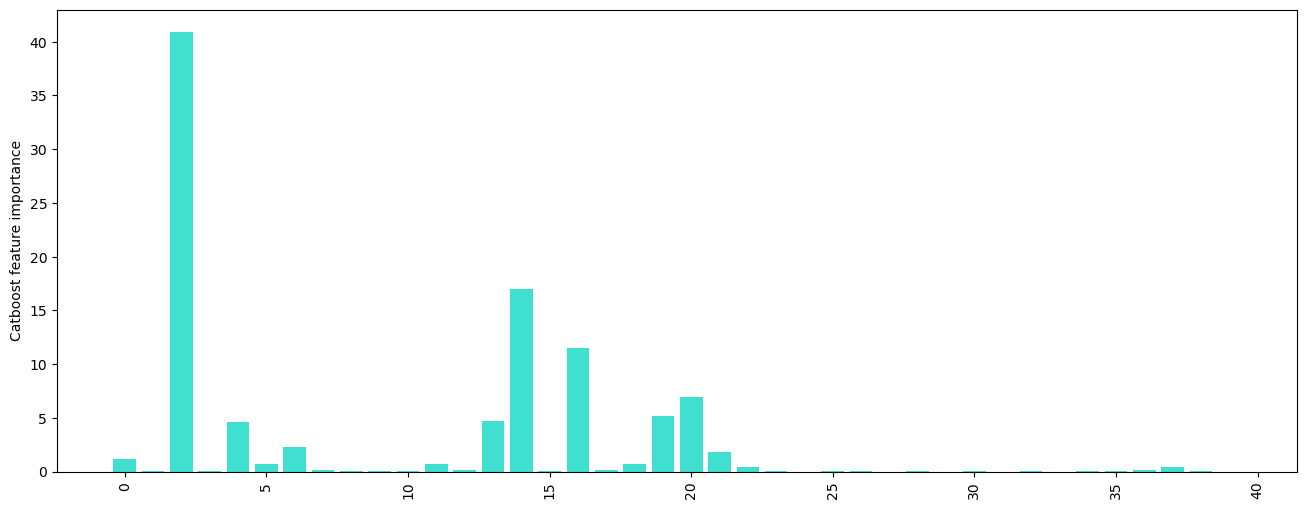

In [69]:
plt.bar(features_importance_df.features,features_importance_df.importance,color = "turquoise")
plt.ylabel('Catboost feature importance')
plt.xticks(rotation=90)
plt.show()

# Prediction

In [73]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2score = r2_score(y_test,y_pred)
print("testing performace")
print("rmse {:.2f}: ".format(rmse))
print("r2 {:.2f}: ".format(r2score))

testing performace
rmse 0.08: 
r2 0.93: 


In [74]:
import pickle

In [ ]:
model = pickle.dump()